In [1]:
import glob
from IPython.display import Image
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import pandas as pd
import openmc
%matplotlib inline
import os 
os.environ['OPENMC_CROSS_SECTIONS']='/home/nushaer/Desktop/meh/endfb-viii.0-hdf5/cross_sections.xml'
import openmc.deplete
openmc.config['cross_sections']='/home/nushaer/Desktop/meh/endfb-viii.0-hdf5/cross_sections.xml'
openmc.config['chain_file']='/home/nushaer/Desktop/meh/endfb-viii.0-hdf5/chain_casl_sfr.xml'
import math

/tmp/ipykernel_57000/1538660874.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
fuel_temp = 900
coolant1_temp = 900
coolant2_temp = 600 #250K 294K 300 600 900 1200 2500

In [3]:
tmox = openmc.Material(material_id=1, name='Mixed oxide')
tmox.add_nuclide('U235', 0.0018, 'wo')
tmox.add_nuclide('U238', 0.4528, 'wo')
tmox.add_nuclide('Th232', 0.23, 'wo')
tmox.add_nuclide('Pu238', 0.0053, 'wo')
tmox.add_nuclide('Pu239', 0.12, 'wo')
tmox.add_nuclide('Pu240', 0.0445, 'wo')
tmox.add_nuclide('Pu241', 0.0124, 'wo')
tmox.add_nuclide('Pu242', 0.0156, 'wo')
tmox.add_nuclide('O16', 0.1176, 'wo')
tmox.set_density('g/cc',10.0)
tmox.temperature = fuel_temp

seed_fuel = openmc.Material(material_id=2, name='Seed or breeder')
seed_fuel.add_element('U', 1.0, enrichment= 0.3)
seed_fuel.add_element('O', 2.0)
seed_fuel.set_density('g/cc',10.0)
seed_fuel.temperature = fuel_temp

uranium_50 = openmc.Material(material_id=3, name='Enrichment 5.0')
uranium_50.add_nuclide('U238', 0.93)
uranium_50.add_nuclide('U235', 0.07)
uranium_50.add_element('O', 2.0)
uranium_50.set_density('g/cc', 10.4)
uranium_50.temperature = fuel_temp

uranium_60 = openmc.Material(material_id=4, name='Enrichment 6.0')
uranium_60.add_nuclide('U238', 0.94)
uranium_60.add_nuclide('U235', 0.06)
uranium_60.add_element('O', 2.0)
uranium_60.set_density('g/cc', 10.4)
uranium_60.temperature = fuel_temp

uranium_70 = openmc.Material(material_id=5, name='Enrichment 7.0')
uranium_70.add_nuclide('U238', 0.93)
uranium_70.add_nuclide('U235', 0.07)
uranium_70.add_nuclide('O16', 2.0)
uranium_70.set_density('g/cc', 10.4)
uranium_70.temperature = fuel_temp


minor_actinides = openmc.Material(material_id=6, name='minor actinides')
minor_actinides.add_nuclide('Np237',0.5620,'wo')
minor_actinides.add_nuclide('Am241',0.2640,'wo')
minor_actinides.add_nuclide('Am243',0.1200,'wo')
minor_actinides.add_nuclide('Cm243',0.0003,'wo')
minor_actinides.add_nuclide('Cm244',0.0511,'wo')
minor_actinides.add_nuclide('Cm245',0.0026,'wo')
minor_actinides.set_density('g/cc', 15.43)
minor_actinides.temperature = fuel_temp

cladding_material = openmc.Material(material_id=7, name="stainless steel 316L")
cladding_material.add_element('Fe',0.66,'wo')
cladding_material.add_element('Cr', 0.17,'wo')
cladding_material.add_element('Ni', 0.12,'wo')
cladding_material.add_element('Mo',0.015,'wo')
cladding_material.add_element('Mn',0.015,'wo')
cladding_material.add_element('Si',0.015,'wo')
cladding_material.set_density('g/cm3',8.0)
cladding_material.temperature = fuel_temp
cladding_material.depletable = False

control_material = openmc.Material(material_id=8, name='boron carbide')
control_material.add_nuclide('B10', 2.6)
control_material.add_nuclide('B11', 1.4)
control_material.add_nuclide('C12', 1.0)
control_material.set_density('g/cm3', 2.52)
control_material.temperature = fuel_temp
control_material.depletable = False

coolant1 = openmc.Material(material_id=9, name='inner Coolant')
coolant1.add_element('H',2.0)
coolant1.add_element('O',1.0)
coolant1.set_density('g/cm3',0.234)
coolant1.temperature = coolant1_temp
coolant1.depletable = False

coolant2 = openmc.Material(material_id=10, name='inner Coolant')
coolant2.add_element('H',2.0)
coolant2.add_element('O',1.0)
coolant2.set_density('g/cm3',0.836)
coolant2.temperature = coolant2_temp
coolant2.depletable = False

seed_with_MA = openmc.Material.mix_materials([seed_fuel,minor_actinides],[0.97,0.03],'wo')
seed_with_MA.temperature = fuel_temp
#seed_with_MA.id = 11

tmox_with_MA = openmc.Material.mix_materials([tmox,minor_actinides],[0.97,0.03],'wo')
tmox_with_MA.temperature = fuel_temp
#tmox_with_MA.id = 12

uranium_70_with_MA = openmc.Material.mix_materials([uranium_70 ,minor_actinides],[0.988,0.012],'wo')
uranium_70_with_MA.temperature = fuel_temp
#uranium_70_with_MA.id = 13

uranium_60_with_MA = openmc.Material.mix_materials([uranium_60 ,minor_actinides],[0.988,0.012],'wo')
uranium_60_with_MA.temperature = fuel_temp
#uranium_60_with_MA.id = 14

uranium_50_with_MA = openmc.Material.mix_materials([uranium_50 ,minor_actinides],[0.988,0.012],'wo')
uranium_50_with_MA.temperature = fuel_temp
#uranium_50_with_MA.id = 15

dep_U = openmc.Material(material_id=16, name='depleted uranium')
dep_U.add_element('U', 1.0, enrichment=0.3)
dep_U.add_element('O', 2.0)
dep_U.set_density('g/cc',10.0)
dep_U.temperature = fuel_temp

MA_fuel = openmc.Material.mix_materials([tmox ,minor_actinides],[0.95,0.05],'wo')
MA_fuel.temperature = fuel_temp
#MA_fuel.id = 17

burna = openmc.Material(material_id=18, name='Burnable absorber')
burna.add_element('Gd',2.0)
burna.add_element('O',3.0)
burna.set_density('g/cc',7.41)

uranium_60_BA = openmc.Material.mix_materials([burna ,uranium_60],[0.03,0.97],'wo')
uranium_60_BA.temperature = fuel_temp
#MA_fuel.id = 19

uranium_70_BA = openmc.Material.mix_materials([burna ,uranium_70],[0.03,0.97],'wo')
uranium_70_BA.temperature = fuel_temp
#MA_fuel.id = 20

uranium_50_BA = openmc.Material.mix_materials([burna ,uranium_50],[0.03,0.97],'wo')
uranium_50_BA.temperature = fuel_temp
#MA_fuel.id = 21




In [4]:
materials = openmc.Materials([tmox,seed_fuel,uranium_60, uranium_70,
                              cladding_material,control_material,coolant1,coolant2,
                              MA_fuel])
materials.export_to_xml()

mat_colors = {tmox:'brown',seed_fuel:'green',uranium_50:'cyan',uranium_60:'blue',
              uranium_70:'purple',seed_with_MA:'yellow',cladding_material:'black',
              control_material:'red',coolant1:'aqua',coolant2:'lightblue',
              tmox_with_MA:'orange',}

In [5]:
#filling empty space
mod_cell = openmc.Cell(fill=coolant2)
mod_u = openmc.Universe(cells=(mod_cell,))

coolant_cell = openmc.Cell(fill=coolant1)
coolant_u = openmc.Universe(cells=(coolant_cell,))

In [6]:
core_bottom = openmc.ZPlane(surface_id = 100, z0=-225, boundary_type = 'vacuum') #core height bottom
core_top= openmc.ZPlane(surface_id = 101, z0=225, boundary_type = 'vacuum') #core height top

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

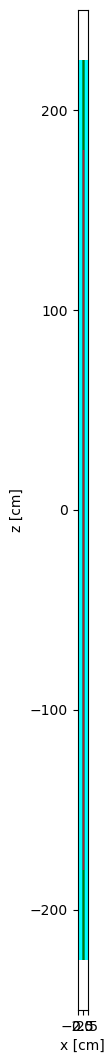

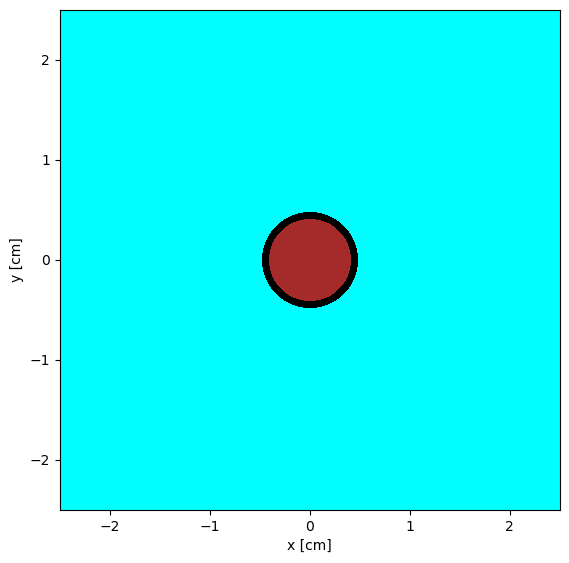

In [7]:
##inner fuel rod

fuel_ir1 = openmc.ZCylinder(surface_id = 200, r=0.41)
fuel_or1 = openmc.ZCylinder(surface_id = 201, r=0.48)

layers = [-225,-180,-140,-100,-60,-20,20,60,100,140,180,225]

layer_surfaces = [openmc.ZPlane(z0=z) for z in layers]

seed_region = [(-fuel_ir1 & +layer_surfaces[0] & -layer_surfaces[1]),
               (-fuel_ir1 & +layer_surfaces[2] & -layer_surfaces[3]),
               (-fuel_ir1 & +layer_surfaces[4] & -layer_surfaces[5]),
               (-fuel_ir1 & +layer_surfaces[6] & -layer_surfaces[7]),
               (-fuel_ir1 & +layer_surfaces[8] & -layer_surfaces[9]),
               (-fuel_ir1 & +layer_surfaces[10] & -layer_surfaces[11])]

fuel_region = [(-fuel_ir1 & +layer_surfaces[1] & -layer_surfaces[2]),
               (-fuel_ir1 & +layer_surfaces[3] & -layer_surfaces[4]),
               (-fuel_ir1 & +layer_surfaces[5] & -layer_surfaces[6]),
               (-fuel_ir1 & +layer_surfaces[7] & -layer_surfaces[8]),
               (-fuel_ir1 & +layer_surfaces[9] & -layer_surfaces[10])]

clad_region = +fuel_ir1 & -fuel_or1 & +core_bottom & -core_top

coolant_region = +fuel_or1 & +core_bottom & -core_top

fuel_cell1 = [openmc.Cell()]
for i in [0,1,2,3,4]:
    fuel_cell1.insert(i,openmc.Cell( fill=tmox, region=fuel_region[i]))

seed_cell1 = [openmc.Cell()]
seed_cell1.insert(0,openmc.Cell( fill=seed_fuel, region=seed_region[0]))
for i in [1,2,3,4]:
    seed_cell1.insert(i,openmc.Cell( fill=tmox, region=seed_region[i]))
seed_cell1.insert(5,openmc.Cell( fill=seed_fuel, region=seed_region[5]))


clad_cell1 = openmc.Cell(cell_id=101, fill=cladding_material, region=clad_region)

coolant_cell1 = openmc.Cell(cell_id=102, fill=coolant1, region=coolant_region)

fast_fuel_rod= openmc.Universe(cells=[fuel_cell1[0],fuel_cell1[1],fuel_cell1[2],
                                      fuel_cell1[3],fuel_cell1[4], 
                                      seed_cell1[0],seed_cell1[1],seed_cell1[2],
                                      seed_cell1[3],seed_cell1[4],seed_cell1[5],
                                      clad_cell1,coolant_cell1,])

fast_fuel_rod.plot(origin = (0,0,0), pixels=(50, 1000), width = (5.,500),
                   color_by = 'material',colors=mat_colors, basis='xz')
fast_fuel_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (5,5), 
                   color_by = 'material',colors=mat_colors, basis='xy')

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

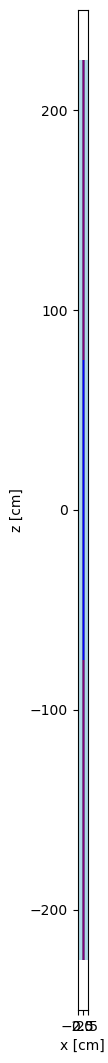

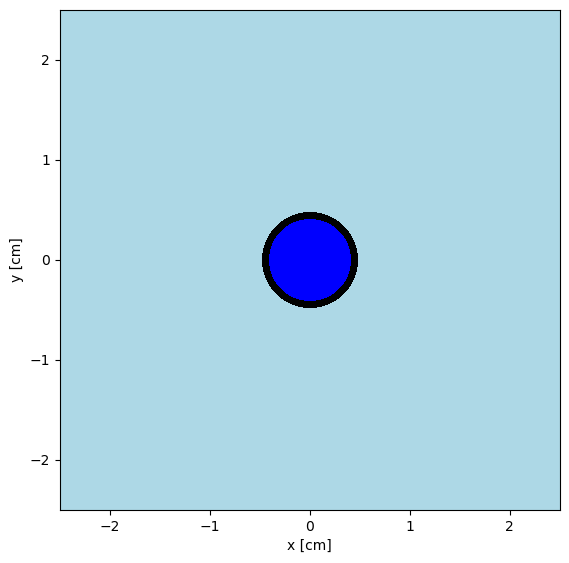

In [8]:
##outer fuel rod


U_layers = [-225,-75,75,225]

U_layer_surfaces = [openmc.ZPlane(z0=z) for z in U_layers]

t_fuel_region = [(-fuel_ir1 & +U_layer_surfaces[0] & -U_layer_surfaces[1]),
               (-fuel_ir1 & +U_layer_surfaces[1] & -U_layer_surfaces[2]),
               (-fuel_ir1 & +U_layer_surfaces[2] & -U_layer_surfaces[3])]

fuel_cell2 = [openmc.Cell()]

fuel_cell2.insert(0,openmc.Cell( fill=uranium_70, region=t_fuel_region[0]))
fuel_cell2.insert(1,openmc.Cell( fill=uranium_60, region=t_fuel_region[1]))
fuel_cell2.insert(2,openmc.Cell( fill=uranium_70, region=t_fuel_region[2]))

clad_cell2 = openmc.Cell(cell_id=201, fill=cladding_material, region=clad_region)

coolant_cell2 = openmc.Cell(cell_id=202, fill=coolant2, region=coolant_region)

thermal_fuel_rod= openmc.Universe(cells=[fuel_cell2[0],fuel_cell2[1],fuel_cell2[2],
                                        coolant_cell2,clad_cell2])

thermal_fuel_rod.plot(origin = (0,0,0), pixels=(50, 1000), width = (5.,500),
                   color_by = 'material',colors=mat_colors, basis='xz')
thermal_fuel_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (5,5), 
                   color_by = 'material',colors=mat_colors, basis='xy')

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

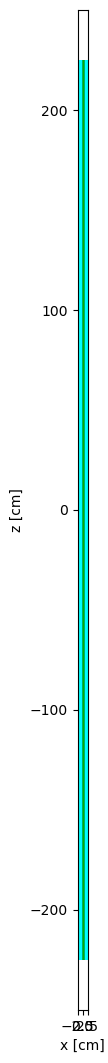

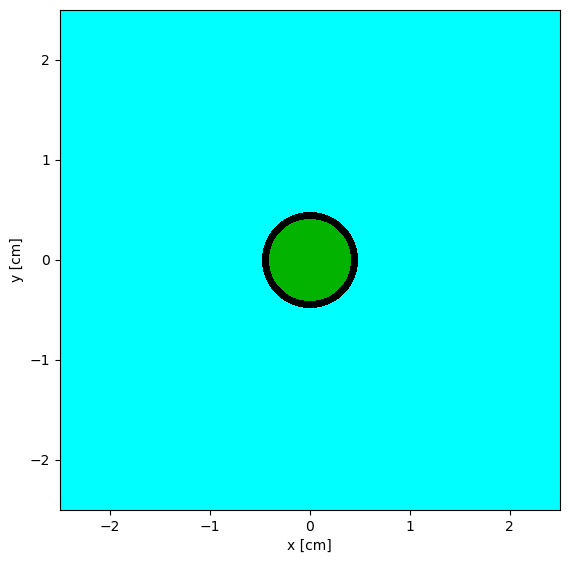

In [9]:
fuel_ir_ma = openmc.ZCylinder(r=0.41)
fuel_or_ma = openmc.ZCylinder( r=0.48)

ma_layers = [-225,-180,-140,-100,-60,-20,20,60,100,140,180,225]

ma_layer_surfaces = [openmc.ZPlane(z0=z) for z in ma_layers]

ma_seed_region = [(-fuel_ir_ma & +ma_layer_surfaces[0] & -ma_layer_surfaces[1]),
               (-fuel_ir_ma & +ma_layer_surfaces[2] & -ma_layer_surfaces[3]),
               (-fuel_ir_ma & +ma_layer_surfaces[4] & -ma_layer_surfaces[5]),
               (-fuel_ir_ma & +ma_layer_surfaces[6] & -ma_layer_surfaces[7]),
               (-fuel_ir_ma & +ma_layer_surfaces[8] & -ma_layer_surfaces[9]),
               (-fuel_ir_ma & +ma_layer_surfaces[10] & -ma_layer_surfaces[11])]

ma_fuel_region = [(-fuel_ir_ma & +ma_layer_surfaces[1] & -ma_layer_surfaces[2]),
               (-fuel_ir_ma & +ma_layer_surfaces[3] & -ma_layer_surfaces[4]),
               (-fuel_ir_ma & +ma_layer_surfaces[5] & -ma_layer_surfaces[6]),
               (-fuel_ir_ma & +ma_layer_surfaces[7] & -ma_layer_surfaces[8]),
               (-fuel_ir_ma & +ma_layer_surfaces[9] & -ma_layer_surfaces[10])]

ma_clad_region = +fuel_ir_ma & -fuel_or_ma & +core_bottom & -core_top

ma_coolant_region = +fuel_or_ma & +core_bottom & -core_top

fuel_cell_ma = [openmc.Cell()]
for i in [0,1,2,3,4]:
    fuel_cell_ma.insert(i,openmc.Cell( fill=MA_fuel, region=ma_fuel_region[i]))

seed_cell_ma = [openmc.Cell()]
seed_cell_ma.insert(0,openmc.Cell( fill=MA_fuel, region=ma_seed_region[0]))
for i in [1,2,3,4]:
    seed_cell_ma.insert(i,openmc.Cell( fill=MA_fuel, region=ma_seed_region[i]))
seed_cell_ma.insert(5,openmc.Cell( fill=MA_fuel, region=ma_seed_region[5]))


clad_cell_ma = openmc.Cell( fill=cladding_material, region=ma_clad_region)

coolant_cell_ma = openmc.Cell( fill=coolant1, region=ma_coolant_region)

MA_fuel_rod= openmc.Universe(cells=[fuel_cell_ma[0],fuel_cell_ma[1],fuel_cell_ma[2],
                                      fuel_cell_ma[3],fuel_cell_ma[4], 
                                      seed_cell_ma[0],seed_cell_ma[1],seed_cell_ma[2],
                                      seed_cell_ma[3],seed_cell_ma[4],seed_cell_ma[5],
                                      clad_cell_ma,coolant_cell_ma,])

MA_fuel_rod.plot(origin = (0,0,0), pixels=(50, 1000), width = (5.,500),
                   color_by = 'material',colors=mat_colors, basis='xz')
MA_fuel_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (5,5), 
                   color_by = 'material',colors=mat_colors, basis='xy')





##Minor Actinides fuel rod


MA_U_layers = [-225,-105,15,225]

MA_U_layer_surfaces = [openmc.ZPlane(z0=z) for z in U_layers]

MA_fuel_region = [(-fuel_ir1 & +MA_U_layer_surfaces[0] & -MA_U_layer_surfaces[1]),
               (-fuel_ir1 & +MA_U_layer_surfaces[1] & -MA_U_layer_surfaces[2]),
               (-fuel_ir1 & +MA_U_layer_surfaces[2] & -MA_U_layer_surfaces[3])]

fuel_cell3 = [openmc.Cell()]

fuel_cell3.insert(0,openmc.Cell( fill=MA_fuel, region=MA_fuel_region[0]))
fuel_cell3.insert(1,openmc.Cell( fill=MA_fuel, region=MA_fuel_region[1]))
fuel_cell3.insert(2,openmc.Cell( fill=MA_fuel, region=MA_fuel_region[2]))

clad_cell3 = openmc.Cell(cell_id=2001, fill=cladding_material, region=clad_region)

coolant_cell3 = openmc.Cell(cell_id=2002, fill=coolant1, region=coolant_region)

MA_fuel_rod= openmc.Universe(cells=[fuel_cell3[0],fuel_cell3[1],fuel_cell3[2],
                                        coolant_cell3,clad_cell3])


<Axes: xlabel='x [cm]', ylabel='y [cm]'>

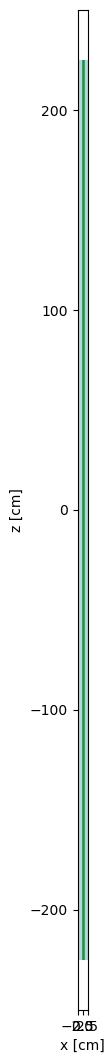

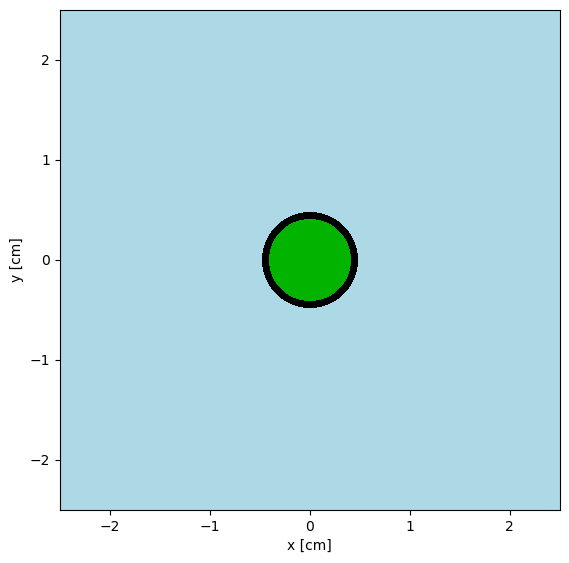

In [10]:
fuel_ir_ma_2 = openmc.ZCylinder(r=0.41)
fuel_or_ma_2 = openmc.ZCylinder( r=0.48)

ma_layers_2 = [-225,-180,-140,-100,-60,-20,20,60,100,140,180,225]

ma_layer_surfaces_2 = [openmc.ZPlane(z0=z) for z in ma_layers_2]

ma_seed_region_2 = [(-fuel_ir_ma_2 & +ma_layer_surfaces_2[0] & -ma_layer_surfaces_2[1]),
               (-fuel_ir_ma_2 & +ma_layer_surfaces_2[2] & -ma_layer_surfaces_2[3]),
               (-fuel_ir_ma_2 & +ma_layer_surfaces_2[4] & -ma_layer_surfaces_2[5]),
               (-fuel_ir_ma_2 & +ma_layer_surfaces_2[6] & -ma_layer_surfaces_2[7]),
               (-fuel_ir_ma_2 & +ma_layer_surfaces_2[8] & -ma_layer_surfaces_2[9]),
               (-fuel_ir_ma_2 & +ma_layer_surfaces_2[10] & -ma_layer_surfaces_2[11])]

ma_fuel_region_2 = [(-fuel_ir_ma_2 & +ma_layer_surfaces_2[1] & -ma_layer_surfaces_2[2]),
               (-fuel_ir_ma_2 & +ma_layer_surfaces_2[3] & -ma_layer_surfaces_2[4]),
               (-fuel_ir_ma_2 & +ma_layer_surfaces_2[5] & -ma_layer_surfaces_2[6]),
               (-fuel_ir_ma_2 & +ma_layer_surfaces_2[7] & -ma_layer_surfaces_2[8]),
               (-fuel_ir_ma_2 & +ma_layer_surfaces_2[9] & -ma_layer_surfaces_2[10])]

ma_clad_region_2 = +fuel_ir_ma_2 & -fuel_or_ma_2 & +core_bottom & -core_top

ma_coolant_region_2 = +fuel_or_ma_2 & +core_bottom & -core_top

fuel_cell_ma_2 = [openmc.Cell()]
for i in [0,1,2,3,4]:
    fuel_cell_ma_2.insert(i,openmc.Cell( fill=MA_fuel, region=ma_fuel_region_2[i]))

seed_cell_ma_2 = [openmc.Cell()]
seed_cell_ma_2.insert(0,openmc.Cell( fill=MA_fuel, region=ma_seed_region_2[0]))
for i in [1,2,3,4]:
    seed_cell_ma_2.insert(i,openmc.Cell( fill=MA_fuel, region=ma_seed_region_2[i]))
seed_cell_ma_2.insert(5,openmc.Cell( fill=MA_fuel, region=ma_seed_region_2[5]))


clad_cell_ma_2 = openmc.Cell( fill=cladding_material, region=ma_clad_region_2)

coolant_cell_ma_2 = openmc.Cell( fill=coolant2, region=ma_coolant_region_2)

MA_fuel_rod_2= openmc.Universe(cells=[fuel_cell_ma_2[0],fuel_cell_ma_2[1],fuel_cell_ma_2[2],
                                      fuel_cell_ma_2[3],fuel_cell_ma_2[4], 
                                      seed_cell_ma_2[0],seed_cell_ma_2[1],seed_cell_ma_2[2],
                                      seed_cell_ma_2[3],seed_cell_ma_2[4],seed_cell_ma_2[5],
                                      clad_cell_ma_2,coolant_cell_ma_2,])

MA_fuel_rod_2.plot(origin = (0,0,0), pixels=(50, 1000), width = (5.,500),
                   color_by = 'material',colors=mat_colors, basis='xz')
MA_fuel_rod_2.plot(origin = (0,0,0), pixels=(500, 500), width = (5,5), 
                   color_by = 'material',colors=mat_colors, basis='xy')

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

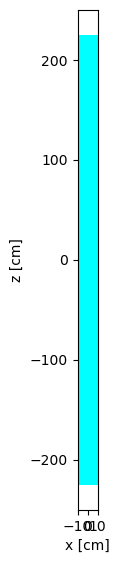

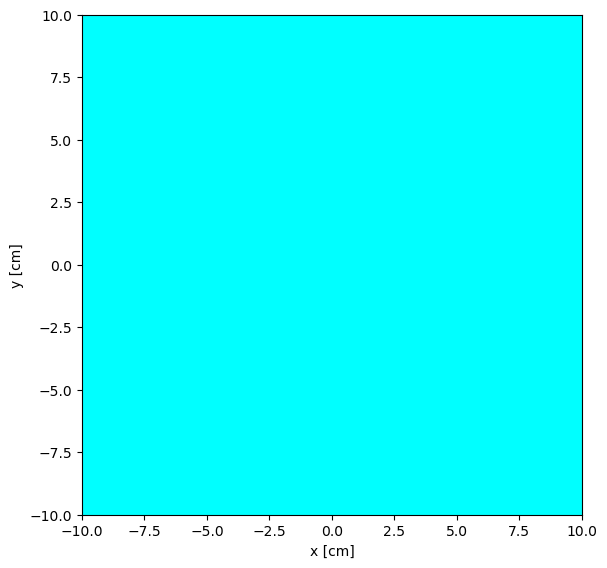

In [11]:
#fast region control rod
control_rod_radius = openmc.ZCylinder(r=1.85)
control_rod_clad_radius = openmc.ZCylinder(r=1.95)
control_rod_bottom = openmc.ZPlane(z0 =225)

control_rod_region = -control_rod_radius & -core_top & +control_rod_bottom 
control_rod_clad_region = -control_rod_clad_radius & +control_rod_radius & -core_top & +control_rod_bottom 
control_rod_bottom_region = -control_rod_clad_radius & -control_rod_bottom & +core_bottom
control_rod_coolant_region = +control_rod_clad_radius & -core_top & +core_bottom 

cr_cell = openmc.Cell(cell_id=300, fill=control_material, region=control_rod_region)
cr_clad_cell = openmc.Cell(cell_id=301, fill=cladding_material, region=control_rod_clad_region)
cr_coolant_cell = openmc.Cell(cell_id=302, fill=coolant1, region=control_rod_coolant_region)
cr_bottom_cell = openmc.Cell(cell_id=303, fill=coolant1, region=control_rod_bottom_region)

control_rod = openmc.Universe(cells=[cr_cell,cr_clad_cell,cr_coolant_cell,cr_bottom_cell])

control_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (20,500), 
                 color_by = 'material',colors=mat_colors, basis='xz')
control_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (20,20), 
                 color_by = 'material',colors=mat_colors, basis='xy')

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

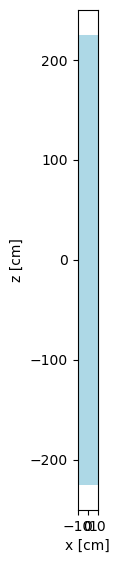

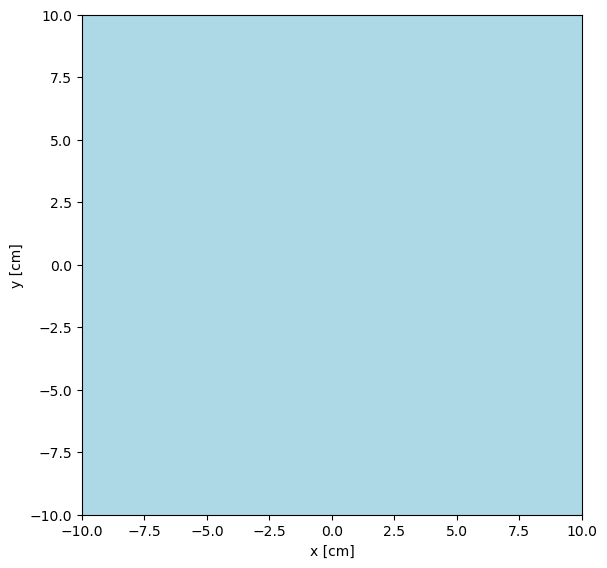

In [12]:
#thermal region control rod

t_cr_cell = openmc.Cell(cell_id=500, fill=control_material, region=control_rod_region)
t_cr_clad_cell = openmc.Cell(cell_id=501, fill=cladding_material, region=control_rod_clad_region)
t_cr_coolant_cell = openmc.Cell(cell_id=502, fill=coolant2, region=control_rod_coolant_region)
t_cr_bottom_cell = openmc.Cell(cell_id=503, fill=coolant2, region=control_rod_bottom_region)

t_control_rod = openmc.Universe(cells=[t_cr_cell,t_cr_clad_cell,t_cr_coolant_cell,t_cr_bottom_cell])

t_control_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (20,500), 
                   color_by = 'material',colors=mat_colors, basis='xz')
t_control_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (20,20), 
                   color_by = 'material',colors=mat_colors, basis='xy')

cr_cell = openmc.Cell(cell_id=300, fill=control_material, region=control_rod_region)
cr_clad_cell = openmc.Cell(cell_id=301, fill=cladding_material, region=control_rod_clad_region)
cr_coolant_cell = openmc.Cell(cell_id=302, fill=coolant1, region=control_rod_coolant_region)
cr_bottom_cell = openmc.Cell(cell_id=303, fill=coolant1, region=control_rod_bottom_region)

t_cr_cell = openmc.Cell(cell_id=500,  fill=control_material, region=control_rod_region)
t_cr_clad_cell = openmc.Cell(cell_id=501,   fill=cladding_material, region=control_rod_clad_region)
t_cr_coolant_cell = openmc.Cell( cell_id=502,  fill=coolant2, region=control_rod_coolant_region)


In [13]:
#blank fuel rods to simulate channels 

fuel_cellb = openmc.Cell(cell_id=1600,  fill=cladding_material, region=-fuel_or1 & +core_bottom & -core_top)
coolant_cellb = openmc.Cell(cell_id=1602, fill=coolant1, region=+fuel_or1 & +core_bottom & -core_top)


fast_fuel_rod_blank= openmc.Universe(cells=[fuel_cellb, coolant_cellb])


fuel_cellc = openmc.Cell(cell_id=1700,  fill=coolant2, region=fuel_cellb.region)
coolant_cellc = openmc.Cell(cell_id=1702, fill=coolant2, region=coolant_cellb.region)


thermal_fuel_rod_blank= openmc.Universe(cells=[fuel_cellc,coolant_cellc])

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

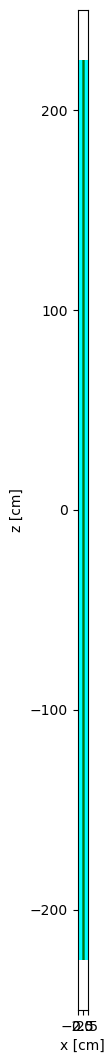

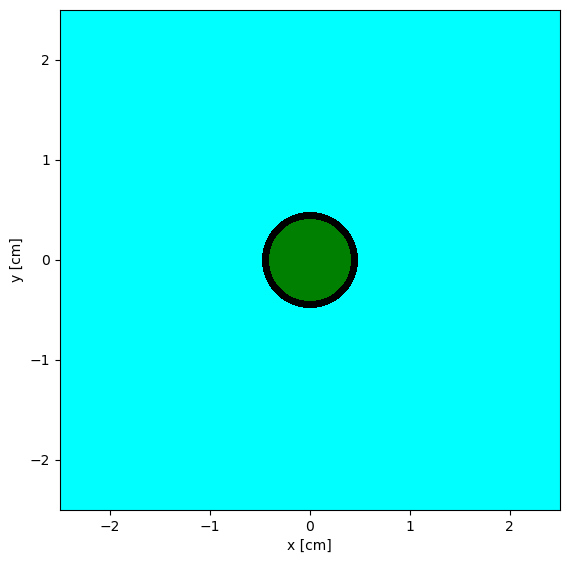

In [14]:
##blanket fuel rod

fuel_ir_br = openmc.ZCylinder(r=0.41)
fuel_or_br = openmc.ZCylinder(r=0.48)

layers_br = [-225,-180,-140,-100,-60,-20,20,60,100,140,180,225]

layer_surfaces_br = [openmc.ZPlane(z0=z) for z in layers_br]

seed_region_br = [(-fuel_ir_br & +layer_surfaces_br[0] & -layer_surfaces_br[1]),
               (-fuel_ir_br & +layer_surfaces_br[2] & -layer_surfaces_br[3]),
               (-fuel_ir_br & +layer_surfaces_br[4] & -layer_surfaces_br[5]),
               (-fuel_ir_br & +layer_surfaces_br[6] & -layer_surfaces_br[7]),
               (-fuel_ir_br & +layer_surfaces_br[8] & -layer_surfaces_br[9]),
               (-fuel_ir_br & +layer_surfaces_br[10] & -layer_surfaces_br[11])]

fuel_region_br = [(-fuel_ir_br & +layer_surfaces_br[1] & -layer_surfaces_br[2]),
               (-fuel_ir_br & +layer_surfaces_br[3] & -layer_surfaces_br[4]),
               (-fuel_ir_br & +layer_surfaces_br[5] & -layer_surfaces_br[6]),
               (-fuel_ir_br & +layer_surfaces_br[7] & -layer_surfaces_br[8]),
               (-fuel_ir_br & +layer_surfaces_br[9] & -layer_surfaces_br[10])]

clad_region_br = +fuel_ir_br & -fuel_or_br & +core_bottom & -core_top

coolant_region_br = +fuel_or_br & +core_bottom & -core_top

fuel_cell_br = [openmc.Cell()]
for i in [0,1,2,3,4]:
    fuel_cell_br.insert(i,openmc.Cell( fill=seed_fuel, region=fuel_region_br[i]))

seed_cell_br = [openmc.Cell()]
seed_cell_br.insert(0,openmc.Cell( fill=seed_fuel, region=seed_region_br[0]))
for i in [1,2,3,4]:
    seed_cell_br.insert(i,openmc.Cell( fill=seed_fuel, region=seed_region_br[i]))
seed_cell_br.insert(5,openmc.Cell( fill=seed_fuel, region=seed_region_br[5]))


clad_cell1 = openmc.Cell( fill=cladding_material, region=clad_region_br)

coolant_cell1 = openmc.Cell(fill=coolant1, region=coolant_region_br)

RA_fuel_rod= openmc.Universe(cells=[fuel_cell_br[0],fuel_cell_br[1],fuel_cell_br[2],
                                      fuel_cell_br[3],fuel_cell_br[4], 
                                      seed_cell_br[0],seed_cell_br[1],seed_cell_br[2],
                                      seed_cell_br[3],seed_cell_br[4],seed_cell_br[5],
                                      clad_cell1,coolant_cell1,])

RA_fuel_rod.plot(origin = (0,0,0), pixels=(50, 1000), width = (5.,500),
                   color_by = 'material',colors=mat_colors, basis='xz')
RA_fuel_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (5,5), 
                   color_by = 'material',colors=mat_colors, basis='xy')

/home/nushaer/miniforge3/envs/openmc-env/lib/python3.12/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


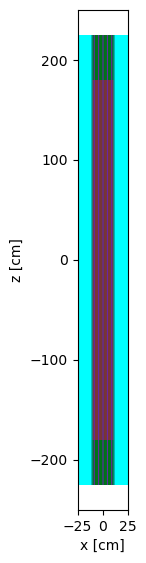

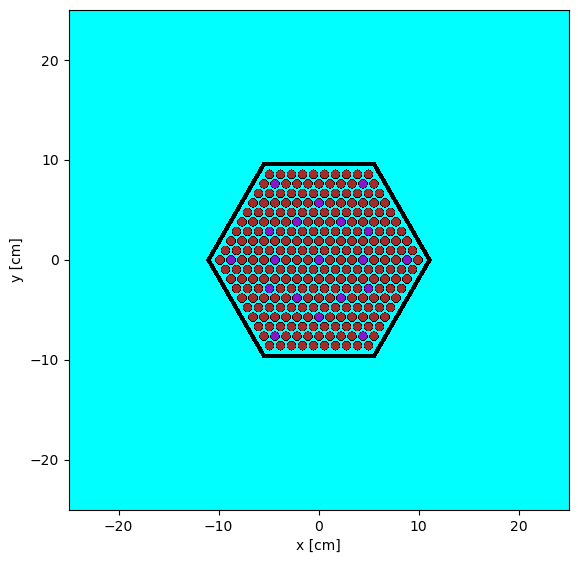

In [15]:
#fast fuel assembly 
infast_ass = openmc.HexLattice(name='fast fuel assembly')
infast_ass.center = (0,0)
infast_ass.pitch = (1.10,)
infast_ass.orientation = 'x'
infast_ass.outer = coolant_u


inring10=[fast_fuel_rod]*54
inring9= ([MA_fuel_rod] + [fast_fuel_rod]*7) * 6
inring8= [fast_fuel_rod]*42
inring7= ([fast_fuel_rod]*3 + [MA_fuel_rod] + [fast_fuel_rod]*2) * 6
inring6= [fast_fuel_rod]*30
inring5= ([MA_fuel_rod] + [fast_fuel_rod]*3) * 6
inring4= [fast_fuel_rod]*18
inring3= [fast_fuel_rod]*12
inring2= [fast_fuel_rod]*6
inring1= [MA_fuel_rod]
infast_ass.universes=[inring10,
                      inring9,
                      inring8,
                      inring7,
                      inring6,
                      inring5,
                      inring4,
                      inring3,
                      inring2,
                      inring1]

fast_lattice_boundary_in= openmc.model.hexagonal_prism(edge_length=10.8,orientation='x')
fast_lattice_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3,orientation='x')

fast_wrapper_cell = openmc.Cell(cell_id=601,  fill=cladding_material, 
                    region= ~fast_lattice_boundary_in & fast_lattice_boundary_out & 
                    -core_top & +core_bottom)

infast_ass_cell = openmc.Cell(cell_id=600,  fill=infast_ass, 
                    region= fast_lattice_boundary_in & -core_top & +core_bottom)


infast_ass_surrounding = openmc.Cell(cell_id=602,fill=coolant1, 
                    region= ~fast_lattice_boundary_out  & -core_top & +core_bottom)

infast_ass_u= openmc.Universe(cells=[infast_ass_cell,infast_ass_surrounding,fast_wrapper_cell])

img1 = infast_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,500), 
                         color_by = 'material',colors=mat_colors, basis='xz')
img2 = infast_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,50), 
                         color_by = 'material',colors=mat_colors)

/home/nushaer/miniforge3/envs/openmc-env/lib/python3.12/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


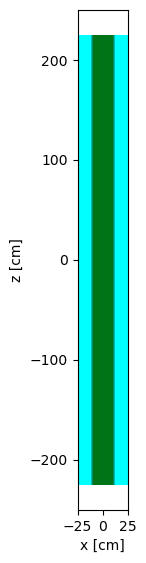

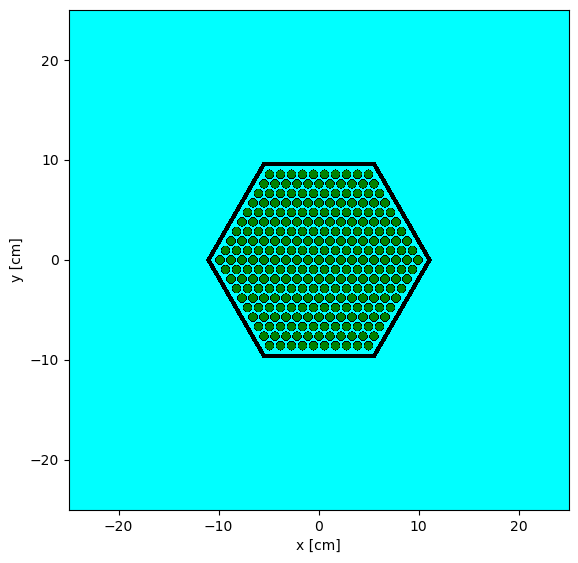

In [16]:
#breeder fuel assembly 
bfast_ass = openmc.HexLattice(name='fast fuel assembly')
bfast_ass.center = (0,0)
bfast_ass.pitch = (1.10,)
bfast_ass.orientation = 'x'
bfast_ass.outer = coolant_u

bring11=[RA_fuel_rod]*60
bring10=[RA_fuel_rod]*54
bring9= [RA_fuel_rod]*48
bring8= [RA_fuel_rod]*42
bring7= [RA_fuel_rod]*36
bring6= [RA_fuel_rod]*30
bring5= [RA_fuel_rod]*24
bring4= [RA_fuel_rod]*18
bring3= [RA_fuel_rod]*12
bring2= [RA_fuel_rod]*6
bring1= [RA_fuel_rod]
bfast_ass.universes=[bring10,
                      bring9,
                      bring8,
                      bring7,
                      bring6,
                      bring5,
                      bring4,
                      bring3,
                      bring2,
                      bring1]

b_lattice_boundary_in= openmc.model.hexagonal_prism(edge_length=10.8,orientation='x')
b_lattice_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3,orientation='x')

b_wrapper_cell = openmc.Cell(cell_id=6001,  fill=cladding_material, 
                    region= ~b_lattice_boundary_in & b_lattice_boundary_out & 
                    -core_top & +core_bottom)

bfast_ass_cell = openmc.Cell(cell_id=6000,  fill=bfast_ass, 
                    region= b_lattice_boundary_in & -core_top & +core_bottom)


bfast_ass_surrounding = openmc.Cell(cell_id=6002,fill=coolant1, 
                    region= ~b_lattice_boundary_out  & -core_top & +core_bottom)

bfast_ass_u= openmc.Universe(cells=[bfast_ass_cell,bfast_ass_surrounding,b_wrapper_cell])

img1 = bfast_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,500), 
                         color_by = 'material',colors=mat_colors, basis='xz')
img2 = bfast_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,50), 
                         color_by = 'material',colors=mat_colors)

/home/nushaer/miniforge3/envs/openmc-env/lib/python3.12/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


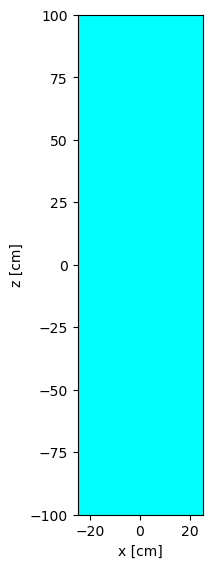

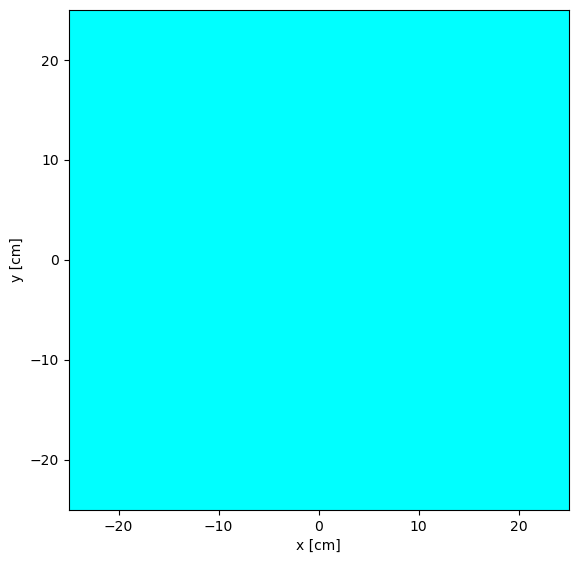

In [17]:
#fast region control rod assembly
fastcontrol_lat = openmc.HexLattice(name='fast control 2nd')
fastcontrol_lat.center = (0., 0.)
fastcontrol_lat.pitch = (4.0,)
fastcontrol_lat.orientation = 'x'
fastcontrol_lat.outer = coolant_u




fcring3= [control_rod]*12
fcring2= [control_rod]*6
fcring1= [control_rod]
fastcontrol_lat.universes=[fcring3,
                           fcring2,
                           fcring1]

f_control_lattice_boundary_in= openmc.model.hexagonal_prism(edge_length=10.8, orientation='x')
f_control_lattice_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3,orientation='x')

f_control_wrapper_cell = openmc.Cell(cell_id=802,  fill=cladding_material, 
                    region= ~f_control_lattice_boundary_in & f_control_lattice_boundary_out & 
                    -core_top & +control_rod_bottom)

f_control_wrapper_cell_out = openmc.Cell(cell_id=803,  fill=coolant1, 
                    region= ~f_control_lattice_boundary_in & f_control_lattice_boundary_out & 
                    -control_rod_bottom & +core_bottom)


fastcontrol_cell = openmc.Cell(cell_id=800,fill=fastcontrol_lat, 
                    region= f_control_lattice_boundary_in & -core_top & +core_bottom)
fastcontrol_surrounding = openmc.Cell(cell_id=801,fill=coolant1, 
                    region= ~f_control_lattice_boundary_out & -core_top & +core_bottom)

fastcontrol_ass_u= openmc.Universe(cells=[fastcontrol_cell,fastcontrol_surrounding,
                                          f_control_wrapper_cell,f_control_wrapper_cell_out])

img1 = fastcontrol_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,200), 
                          color_by = 'material',colors=mat_colors, basis='xz')
img2 = fastcontrol_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,50), 
                          color_by = 'material',colors=mat_colors)

/home/nushaer/miniforge3/envs/openmc-env/lib/python3.12/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


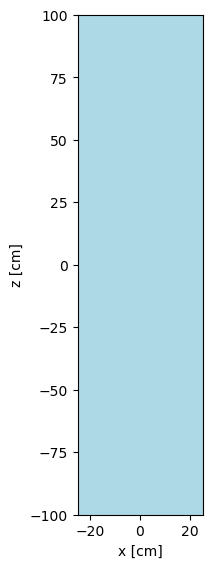

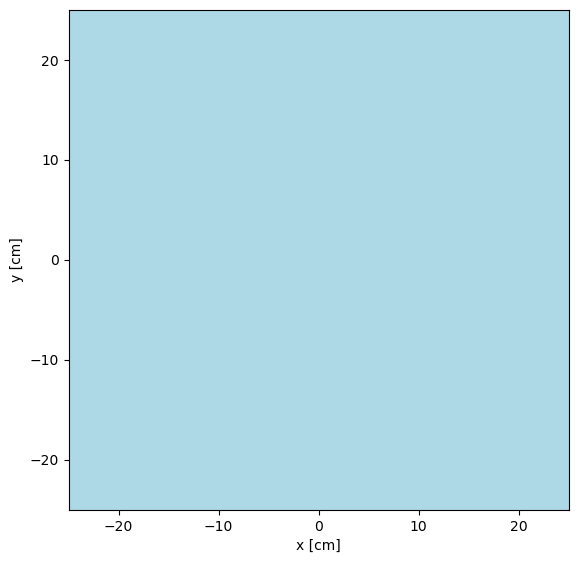

In [18]:
#thermal region control rod assembly
thermalcontrol_lat = openmc.HexLattice(name='thermal control assembly')
thermalcontrol_lat.center = (0., 0.)
thermalcontrol_lat.pitch = (4.0,)
thermalcontrol_lat.orientation = 'x'
thermalcontrol_lat.outer = mod_u




tcring3= [t_control_rod]*12
tcring2= [t_control_rod]*6
tcring1= [t_control_rod]

thermalcontrol_lat.universes=[tcring3,
                              tcring2,
                              tcring1]

t_control_lattice_boundary_in= openmc.model.hexagonal_prism(edge_length=10.8,orientation='x')
t_control_lattice_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3,orientation='x')


t_control_wrapper_cell = openmc.Cell(cell_id=902,  fill=cladding_material, 
                            region= ~t_control_lattice_boundary_in & 
                            t_control_lattice_boundary_out & -core_top & +control_rod_bottom)

t_control_wrapper_cell_out = openmc.Cell(cell_id=903,  fill=coolant2, 
                    region= ~t_control_lattice_boundary_in & t_control_lattice_boundary_out & 
                    -control_rod_bottom & +core_bottom)

thermalcontrol_cell = openmc.Cell(cell_id=900,fill=thermalcontrol_lat, 
                            region= t_control_lattice_boundary_in & -core_top & +core_bottom)
thermalcontrol_surrounding = openmc.Cell(cell_id=901,fill=coolant2, 
                            region= ~t_control_lattice_boundary_out & -core_top & +core_bottom)

thermalcontrol_ass_u= openmc.Universe(cells=[thermalcontrol_cell,
                            thermalcontrol_surrounding,t_control_wrapper_cell,t_control_wrapper_cell_out])

img1 = thermalcontrol_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,200), 
                          color_by = 'material',colors=mat_colors, basis='xz')
img2 = thermalcontrol_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,50), 
                          color_by = 'material',colors=mat_colors)

/home/nushaer/miniforge3/envs/openmc-env/lib/python3.12/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


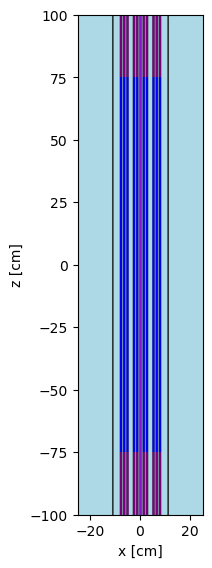

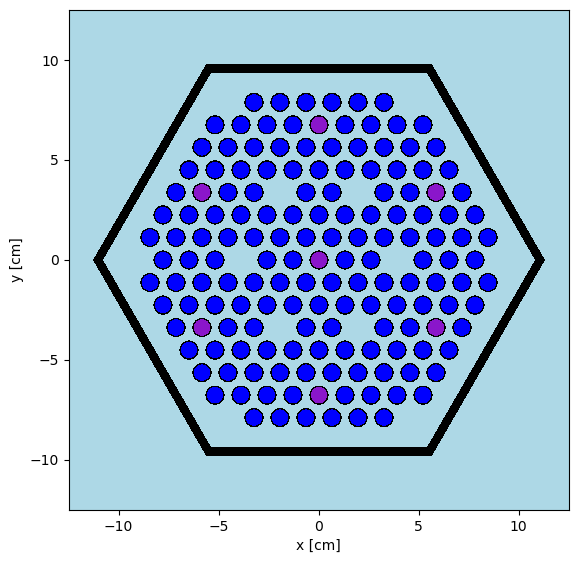

In [19]:
#thermal fuel assembly 
thermal_ass = openmc.HexLattice(name='thermal fuel assembly')
thermal_ass.center = (0,0)
thermal_ass.pitch = (1.3,)
thermal_ass.orientation = 'x'
thermal_ass.outer = mod_u


#thring10= [thermal_fuel_rod]*54
#thring9= [thermal_fuel_rod]*48
thring8= ([thermal_fuel_rod_blank]+[thermal_fuel_rod]*6)*6
thring7= ([thermal_fuel_rod]*3 + [MA_fuel_rod_2] + [thermal_fuel_rod]*2) * 6
thring6= [thermal_fuel_rod]*30
thring5= [thermal_fuel_rod]*24
thring4= ([thermal_fuel_rod_blank] + [thermal_fuel_rod] *2) * 6
thring3= [thermal_fuel_rod]*12
thring2= [thermal_fuel_rod]*6
thring1= [MA_fuel_rod_2]
thermal_ass.universes=[thring8, 
                       thring7,
                       thring6,
                       thring5,
                       thring4,
                       thring3,
                       thring2,
                       thring1]


thermal_lattice_boundary_in= openmc.model.hexagonal_prism(edge_length=10.8,orientation='x')
thermal_lattice_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3,orientation='x')

thermal_wrapper_cell = openmc.Cell(cell_id=1002,  fill=cladding_material, 
                        region= ~thermal_lattice_boundary_in & thermal_lattice_boundary_out &
                        -core_top & +core_bottom)




thermal_ass_cell = openmc.Cell(cell_id=1000,fill=thermal_ass, 
                        region= thermal_lattice_boundary_in & -core_top & +core_bottom)

thermal_ass_surrounding = openmc.Cell(cell_id=1001,fill=coolant2, 
                        region= ~thermal_lattice_boundary_out  & -core_top & +core_bottom)

thermal_ass_u= openmc.Universe(cells=[thermal_ass_cell,thermal_ass_surrounding,thermal_wrapper_cell])

img1 = thermal_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (50,200), 
                         color_by = 'material',colors=mat_colors, basis='xz')
img2 = thermal_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (25,25), 
                         color_by = 'material',colors=mat_colors)

In [20]:
# thermal and Fast Blank assembly

fast_blank_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3)


fast_blank_cell = openmc.Cell(cell_id=1100,fill=coolant1, 
                        region= fast_blank_boundary_out & -core_top & +core_bottom)

fast_blank_cell_out = openmc.Cell(cell_id=1101,fill=coolant1, 
                     region= ~fast_blank_boundary_out & -core_top & +core_bottom)

fast_blank_u = openmc.Universe(cells=[fast_blank_cell,fast_blank_cell_out])
                       
shield_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3)


shield_cell = openmc.Cell(cell_id=2100,fill=cladding_material, 
                        region= shield_boundary_out & -core_top & +core_bottom)

shield_cell_out = openmc.Cell(cell_id=2101,fill=cladding_material, 
                     region= ~shield_boundary_out & -core_top & +core_bottom)

shield_u = openmc.Universe(cells=[shield_cell,shield_cell_out])


thermal_blank_boundary_out= openmc.model.hexagonal_prism(edge_length=11.3)

thermal_blank_cell = openmc.Cell(cell_id=1200,fill=coolant2, 
                        region= thermal_blank_boundary_out & -core_top & +core_bottom)

thermal_blank_cell_out = openmc.Cell(cell_id=1201,fill=coolant2, 
                     region= ~thermal_blank_boundary_out  & -core_top & +core_bottom)

thermal_blank_u = openmc.Universe(cells=[thermal_blank_cell,thermal_blank_cell_out])



/home/nushaer/miniforge3/envs/openmc-env/lib/python3.12/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


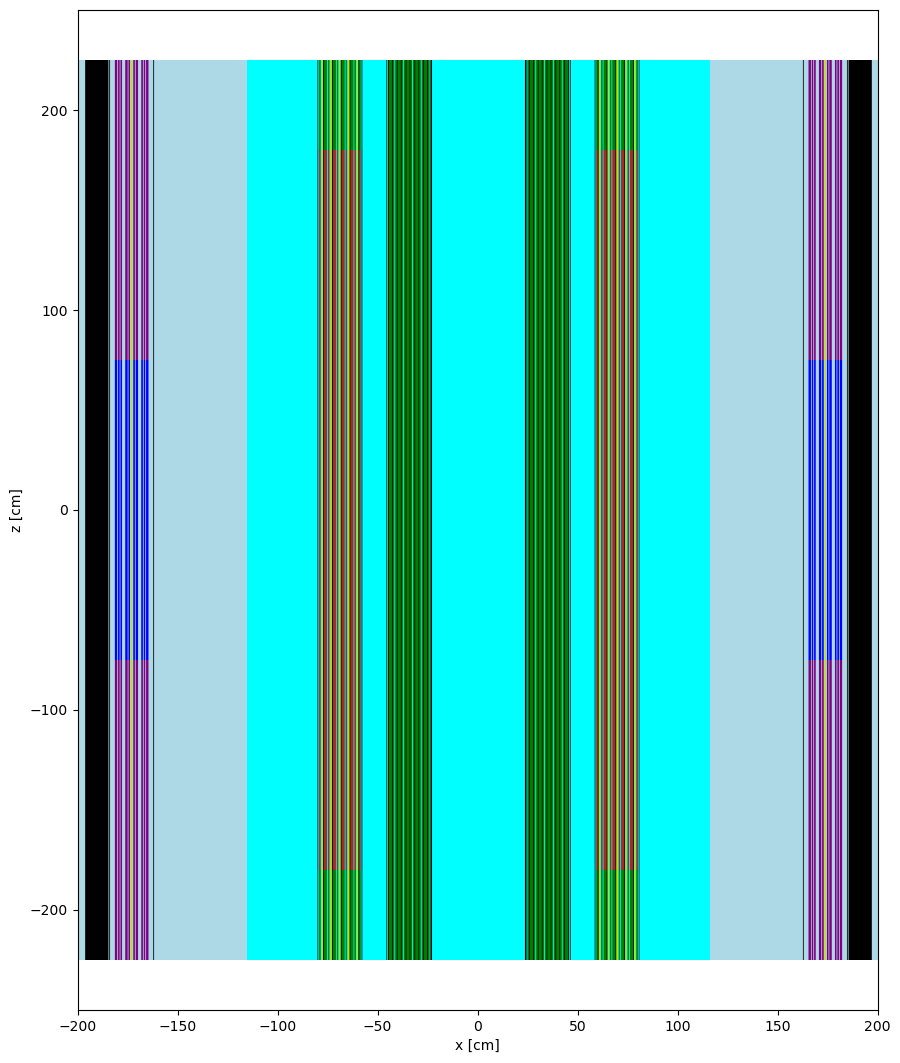

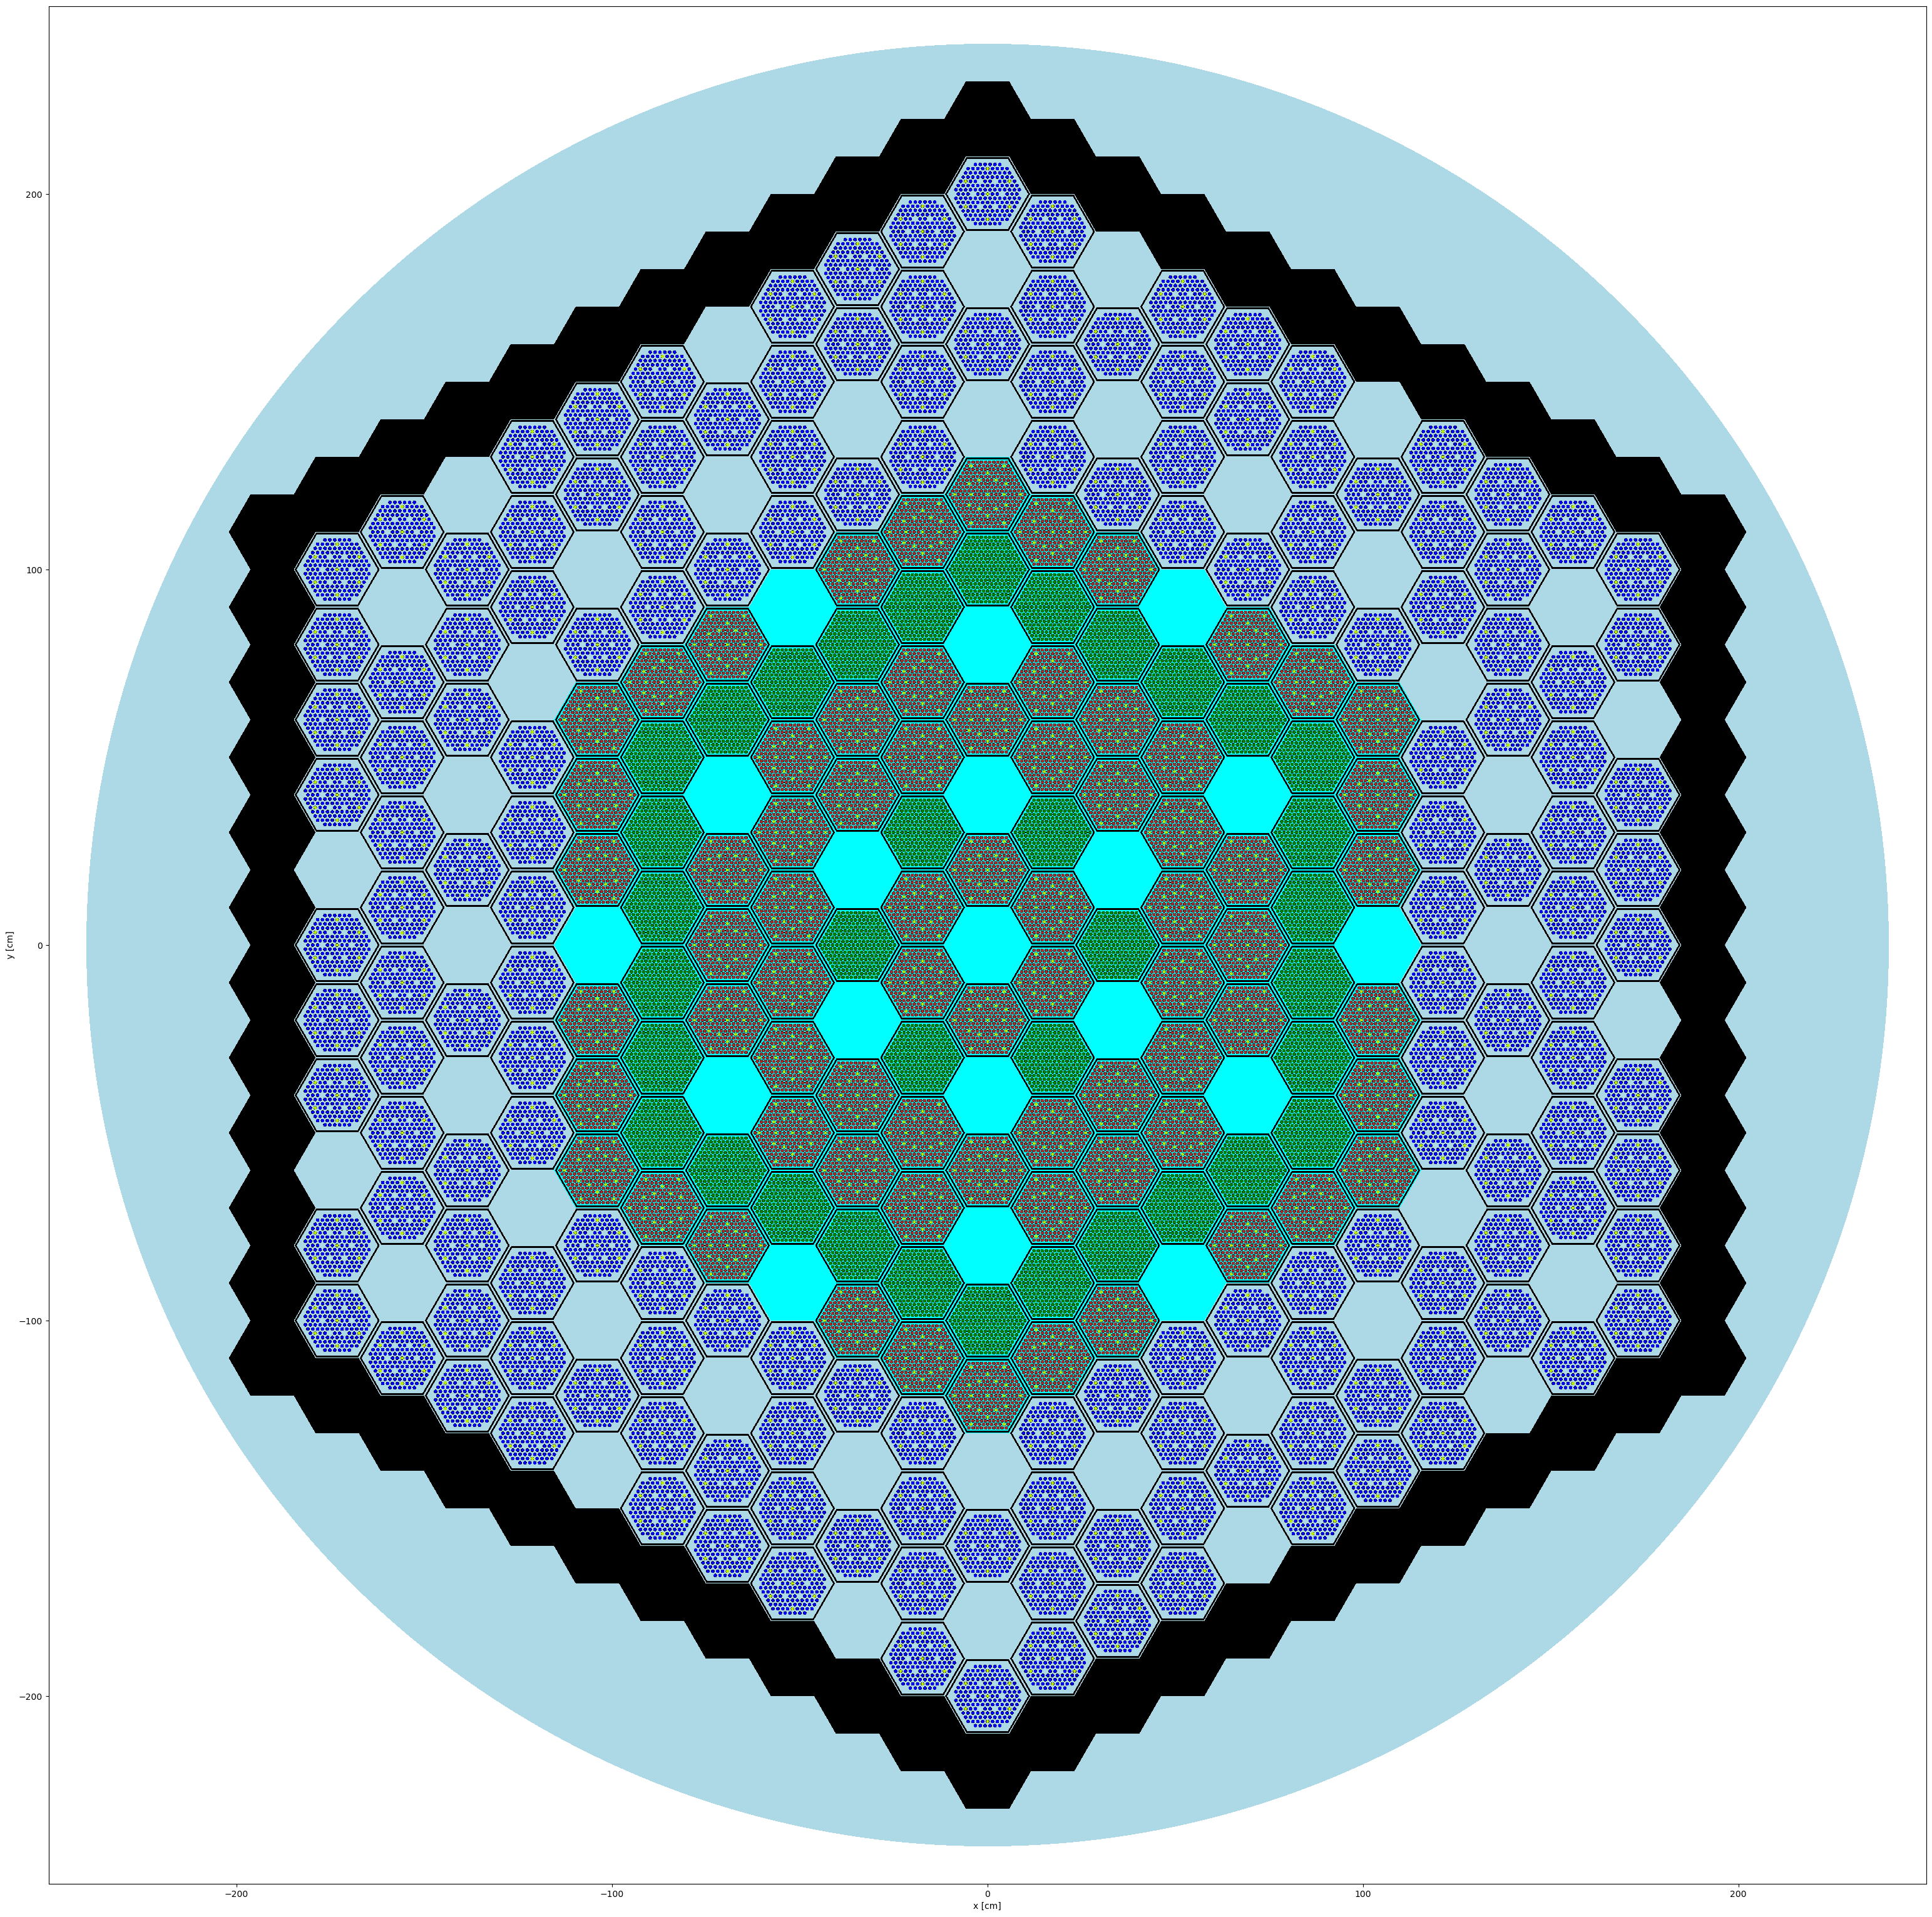

In [21]:
#fast core 
fastcore_lat = openmc.HexLattice(name='fast core')
fastcore_lat.center = (0., 0.)
fastcore_lat.pitch = (20,)
fastcore_lat.orientation = 'y'
fastcore_lat.outer = mod_u

fc12 = [shield_u]*66
fc11 = ([thermal_ass_u]*2 + [thermalcontrol_ass_u]
         +[thermal_ass_u]*3 + [thermalcontrol_ass_u]+[thermal_ass_u]*3)*6 
fc10 = ([thermalcontrol_ass_u] + [thermal_ass_u]*8)*6
fc9 = ([thermal_ass_u]*2 + ([thermalcontrol_ass_u] +[thermal_ass_u])*3)*6
fc8 = ([thermalcontrol_ass_u]+[thermal_ass_u]*6)*6
fc7 = ([infast_ass_u]*3+[fastcontrol_ass_u]+[infast_ass_u]*2)*6
fc6 = [bfast_ass_u]*30
fc5 = ([fastcontrol_ass_u]+[infast_ass_u]*3)*6
fc4 = [infast_ass_u]*18
fc3 = ([fastcontrol_ass_u]+[bfast_ass_u])*6
fc2 = [infast_ass_u]*6
fc1 = [fastcontrol_ass_u]*1
fastcore_lat.universes = [fc12,
                          fc11,
                          fc10,
                          fc9,
                          fc8,
                          fc7,
                          fc6,
                          fc5,
                          fc4,
                          fc3,
                          fc2,
                          fc1]

fastcore_boundary = openmc.ZCylinder(surface_id = 80000, r=240, boundary_type = 'reflective')

fastcore = openmc.Cell(cell_id=1300,fill=fastcore_lat, region=-fastcore_boundary & -core_top & +core_bottom)

fastcore_out = openmc.Cell(cell_id=1301,region=+fastcore_boundary & -core_top & +core_bottom)

core_u = openmc.Universe(cells=[fastcore, fastcore_out]) 

img1 = core_u.plot(origin = (0,0,0), pixels=(1000, 1000), width = (400,500),
                         color_by = 'material',colors=mat_colors, basis='xz')
img2 = core_u.plot(origin = (0,0,0), pixels=(3000, 3000), width = (500,500), 
                         color_by = 'material',colors=mat_colors)

fc11 = [thermal_blank_u]*60
fc10 = ([thermalcontrol_ass_u] + [thermal_ass_u]*8)*6
fc9 = ([thermal_ass_u]*2 + ([thermalcontrol_ass_u] +[thermal_ass_u])*3)*6
fc8 = ([thermalcontrol_ass_u]+[thermal_ass_u]*6)*6
fc7 = [fast_blank_u]*36
fc6 = [infast_ass_u]*30
fc5 = ([fastcontrol_ass_u]+[infast_ass_u]*3)*6

fc4 = [infast_ass_u]*18
fc3 = ([infast_ass_u]+[infast_ass_u]*3)*3
fc2 = [infast_ass_u]*6
fc1 = [fast_blank_u]*1

In [22]:
geom = openmc.Geometry(core_u)
geom.export_to_xml()

In [23]:
lower_left1 = [-200, -200, -225]
upper_right1 = [200, 200, 225]
uniform_dist1 = openmc.stats.Box(lower_left1, upper_right1)
src1 = openmc.IndependentSource(space=uniform_dist1)

lower_left2 = [-10, -10, -10]
upper_right2 = [10, 10, 10]
uniform_dist2 = openmc.stats.Box(lower_left2, upper_right2)
src2 = openmc.IndependentSource(space=uniform_dist2)



settings = openmc.Settings()
settings.source = [src1,src2]
settings.batches = 100
settings.generations_per_batch = 3
settings.inactive = 20
settings.particles = 20000
settings.create_delayed_neutrons = False
settings.export_to_xml()

In [24]:
zmin, zmax = -225., 225.


flux_tally = openmc.Tally()
flux_tally.scores = ['flux']


order = 200
expand_filter = openmc.SpatialLegendreFilter(order, 'x', zmin, zmax)
flux_tally.filters.append(expand_filter)
tallies = openmc.Tallies([flux_tally])

tallies.export_to_xml()

In [25]:
#openmc.run()

Text(0, 0.5, 'Flux [n/src]')

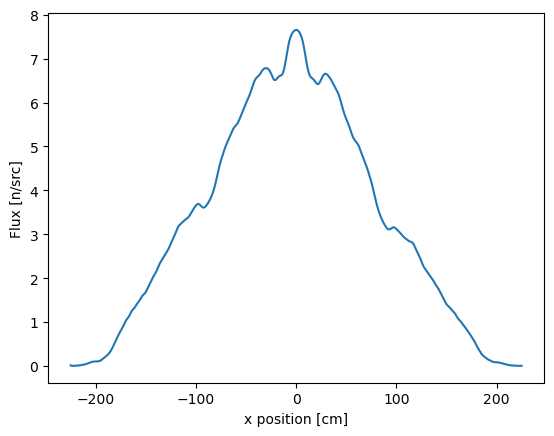

In [26]:
sp = openmc.StatePoint('statepoint.100.h5')
df = sp.tallies[flux_tally.id].get_pandas_dataframe()


n = np.arange(order + 1)
a_n = (2*n + 1)/2 * df['mean']

phi = np.polynomial.Legendre(a_n/10, domain=(zmin, zmax))



z = np.linspace(zmin, zmax, 1000)
plt.plot(z, phi(z))
plt.xlabel('x position [cm]')
plt.ylabel('Flux [n/src]')



In [27]:
#volume calculations 

tmox.volume = math.pi * 0.41**2 * 360 * 252 * 72
seed_fuel.volume = (math.pi * 0.41**2 * 90 * 271 * 72) + (math.pi * 0.41**2 * 450 * 271 * 36)

uranium_60.volume = math.pi * 0.41**2 * 150 * 150 * 162


uranium_70.volume = math.pi * 0.41**2 * 300 * 150 * 162


MA_fuel.volume = math.pi * 0.41**2 * 450 * 19 * 72 +  math.pi * 0.41**2 * 450 * 7 * 162


In [28]:
chain = openmc.deplete.Chain.from_xml("/home/nushaer/Desktop/meh/endfb-viii.0-hdf5/chain_casl_sfr.xml")
model = openmc.Model(geometry=geom, settings=settings)
operator = openmc.deplete.CoupledOperator(model, "/home/nushaer/Desktop/meh/endfb-viii.0-hdf5/chain_casl_sfr.xml")

power = 1800 * 1e6

time_steps = [30] * 12
integrator = openmc.deplete.PredictorIntegrator(operator, time_steps, power, timestep_units='d')

In [29]:
#integrator.integrate()

In [30]:
results = openmc.deplete.Results("./depletion_results.h5")

time, k = results.get_keff()

time /= (24 * 60 * 60)  # convert back to days from seconds

k_inf = k[:, 0]

k_inf= np.array(k_inf).reshape((-1, 1))
k_inf = k_inf.flatten()

In [31]:
k

array([[1.04652849e+00, 4.76459453e-04],
       [1.01628702e+00, 4.23438675e-04],
       [1.01127473e+00, 3.81042925e-04],
       [1.00809335e+00, 3.50765625e-04],
       [1.00414323e+00, 3.78483172e-04],
       [1.00037967e+00, 4.21391362e-04],
       [9.97158756e-01, 4.98061892e-04],
       [9.95546613e-01, 4.25200217e-04],
       [9.92938908e-01, 3.98762654e-04],
       [9.91310493e-01, 3.85521238e-04],
       [9.89668033e-01, 3.51208623e-04],
       [9.88084944e-01, 3.86611210e-04],
       [9.86819865e-01, 3.89414064e-04]])

In [32]:
print(k_inf)

[1.04652849 1.01628702 1.01127473 1.00809335 1.00414323 1.00037967
 0.99715876 0.99554661 0.99293891 0.99131049 0.98966803 0.98808494
 0.98681987]


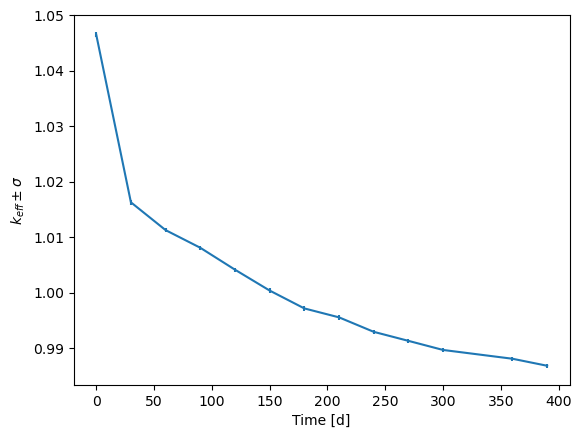

In [31]:
plt.errorbar(time, k[:, 0], yerr=k[:, 1])
plt.xlabel("Time [d]")
plt.ylabel("$k_{eff}\pm \sigma$");

In [32]:
#from tmox mid 1
#tmox uranium_50,60,70 seed
_, th232_1 = results.get_atoms("1", "Th232")
_, u233_1 = results.get_atoms("1","U233")
_, u235_1 = results.get_atoms("1","U235")
_, u238_1 = results.get_atoms("1", "U238")
_, pu238_1 = results.get_atoms("1","Pu238")
_, pu239_1 = results.get_atoms("1","Pu239")
_, pu240_1 = results.get_atoms("1","Pu240")
_, pu241_1 = results.get_atoms("1","Pu241")
_, pu242_1 = results.get_atoms("1","Pu242")
_, xe135_1 = results.get_atoms("1", "Xe135")


_, np237_1 = results.get_atoms("1","Np237")
_, am241_1 = results.get_atoms("1","Am241")
_, am243_1 = results.get_atoms("1", "Am243")
_, cm243_1 = results.get_atoms("1","Cm243")
_, cm244_1 = results.get_atoms("1","Cm244")
_, cm245_1 = results.get_atoms("1", "Cm245")

#seed_ mid 2

_, th232_2 = results.get_atoms("2", "Th232")
_, u233_2 = results.get_atoms("2","U233")
_, u235_2 = results.get_atoms("2","U235")
_, u238_2 = results.get_atoms("2", "U238")
_, pu238_2 = results.get_atoms("2","Pu238")
_, pu239_2 = results.get_atoms("2","Pu239")
_, pu240_2 = results.get_atoms("2","Pu240")
_, pu241_2 = results.get_atoms("2","Pu241")
_, pu242_2 = results.get_atoms("2","Pu242")
_, xe135_2 = results.get_atoms("2", "Xe135")


_, np237_2 = results.get_atoms("2","Np237")
_, am241_2 = results.get_atoms("2","Am241")
_, am243_2 = results.get_atoms("2", "Am243")
_, cm243_2 = results.get_atoms("2","Cm243")
_, cm244_2 = results.get_atoms("2","Cm244")
_, cm245_2 = results.get_atoms("2", "Cm245")





#uranium 60 mid 4

_, th232_4 = results.get_atoms("4", "Th232")
_, u233_4 = results.get_atoms("4","U233")
_, u235_4 = results.get_atoms("4","U235")
_, u238_4 = results.get_atoms("4", "U238")
_, pu238_4 = results.get_atoms("4","Pu238")
_, pu239_4 = results.get_atoms("4","Pu239")
_, pu240_4 = results.get_atoms("4","Pu240")
_, pu241_4 = results.get_atoms("4","Pu241")
_, pu242_4 = results.get_atoms("4","Pu242")
_, xe135_4 = results.get_atoms("4", "Xe135")


_, np237_4 = results.get_atoms("4","Np237")
_, am241_4 = results.get_atoms("4","Am241")
_, am243_4 = results.get_atoms("4", "Am243")
_, cm243_4 = results.get_atoms("4","Cm243")
_, cm244_4 = results.get_atoms("4","Cm244")
_, cm245_4 = results.get_atoms("4", "Cm245")


#uranium 70 mid 5

_, th232_5 = results.get_atoms("5", "Th232")
_, u233_5 = results.get_atoms("5","U233")
_, u235_5 = results.get_atoms("5","U235")
_, u238_5 = results.get_atoms("5", "U238")
_, pu238_5 = results.get_atoms("5","Pu238")
_, pu239_5 = results.get_atoms("5","Pu239")
_, pu240_5 = results.get_atoms("5","Pu240")
_, pu241_5 = results.get_atoms("5","Pu241")
_, pu242_5 = results.get_atoms("5","Pu242")
_, xe135_5 = results.get_atoms("5", "Xe135")


_, np237_5 = results.get_atoms("5","Np237")
_, am241_5 = results.get_atoms("5","Am241")
_, am243_5 = results.get_atoms("5", "Am243")
_, cm243_5 = results.get_atoms("5","Cm243")
_, cm244_5 = results.get_atoms("5","Cm244")
_, cm245_5 = results.get_atoms("5", "Cm245")

#MA fuel mid 17

_, th232_6 = results.get_atoms("17", "Th232")
_, u233_6 = results.get_atoms("17","U233")
_, u235_6 = results.get_atoms("17","U235")
_, u238_6 = results.get_atoms("17", "U238")
_, pu238_6 = results.get_atoms("17","Pu238")
_, pu239_6 = results.get_atoms("17","Pu239")
_, pu240_6 = results.get_atoms("17","Pu240")
_, pu241_6 = results.get_atoms("17","Pu241")
_, pu242_6 = results.get_atoms("17","Pu242")
_, xe135_6 = results.get_atoms("17", "Xe135")


_, np237_6 = results.get_atoms("17","Np237")
_, am241_6 = results.get_atoms("17","Am241")
_, am243_6 = results.get_atoms("17", "Am243")
_, cm243_6 = results.get_atoms("17","Cm243")
_, cm244_6 = results.get_atoms("17","Cm244")
_, cm245_6 = results.get_atoms("17", "Cm245")

th232 = th232_1 + th232_2  + th232_4 + th232_5 + th232_6
u233 = u233_1 + u233_2  + u233_4 + u233_5+  u233_6
u235 = u235_1 + u235_2  + u235_4 + u235_5 + u235_6
u238 = u238_1 + u238_2  + u238_4 + u238_5 + u238_6
pu238 = pu238_1 + pu238_2  + pu238_4 + pu238_5 + pu238_6
pu239 = pu239_1 + pu239_2  + pu239_4 + pu239_5 + pu239_6
pu240 = pu240_1 + pu240_2  + pu240_4 + pu240_5 + pu240_6
pu241 = pu241_1 + pu241_2  + pu241_4 + pu241_5 + pu241_6
pu242 = pu242_1 + pu242_2  + pu242_4 + pu242_5 + pu242_6


np237 = np237_1 + np237_2  + np237_4 + np237_5 + np237_6
am241 = am241_1 + am241_2  + am241_4 + am241_5 + am241_6 
am243 = am243_1 + am243_2  + am243_4 + am243_5 + am243_6
cm243 = cm243_1 + cm243_2  + cm243_4 + cm243_5 + cm243_6
cm244 = cm244_1 + cm244_2  + cm244_4 + cm244_5 + cm244_6
cm245 = cm245_1 + cm245_2  + cm245_4 + cm245_5 + cm245_6

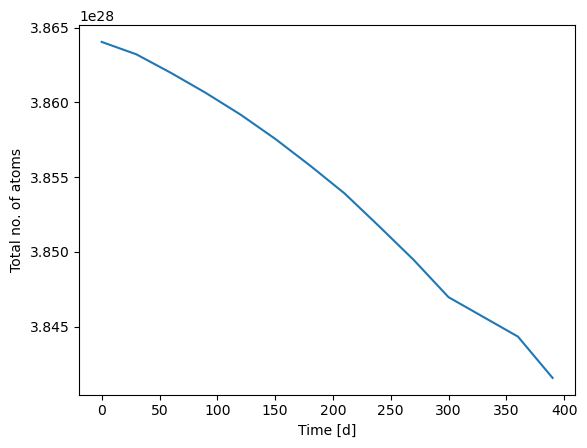

In [34]:
plt.plot(time, u238_1)


plt.xlabel("Time [d]")
plt.ylabel("Total no. of atoms");

In [36]:
th232_1

array([2.23812749e+28, 2.23759808e+28, 2.23680486e+28, 2.23595602e+28,
       2.23503571e+28, 2.23400244e+28, 2.23286353e+28, 2.23166547e+28,
       2.23025122e+28, 2.22880741e+28, 2.22721963e+28, 2.22553362e+28,
       2.22376370e+28])

In [36]:
#from tmox mid 1
#tmox uranium_50,60,70 seed
_, th232_1 = results.get_atoms("1", "Th232")
_, u233_1 = results.get_atoms("1","U233")
_, u235_1 = results.get_atoms("1","U235")
_, u238_1 = results.get_atoms("1", "U238")
_, pu238_1 = results.get_atoms("1","Pu238")
_, pu239_1 = results.get_atoms("1","Pu239")
_, pu240_1 = results.get_atoms("1","Pu240")
_, pu241_1 = results.get_atoms("1","Pu241")
_, pu242_1 = results.get_atoms("1","Pu242")
_, xe135_1 = results.get_atoms("1", "Xe135")


_, np237_1 = results.get_atoms("1","Np237")
_, am241_1 = results.get_atoms("1","Am241")
_, am243_1 = results.get_atoms("1", "Am243")
_, cm243_1 = results.get_atoms("1","Cm243")
_, cm244_1 = results.get_atoms("1","Cm244")
_, cm245_1 = results.get_atoms("1", "Cm245")

#seed_ mid 2

_, th232_2 = results.get_atoms("2", "Th232")
_, u233_2 = results.get_atoms("2","U233")
_, u235_2 = results.get_atoms("2","U235")
_, u238_2 = results.get_atoms("2", "U238")
_, pu238_2 = results.get_atoms("2","Pu238")
_, pu239_2 = results.get_atoms("2","Pu239")
_, pu240_2 = results.get_atoms("2","Pu240")
_, pu241_2 = results.get_atoms("2","Pu241")
_, pu242_2 = results.get_atoms("2","Pu242")
_, xe135_2 = results.get_atoms("2", "Xe135")


_, np237_2 = results.get_atoms("2","Np237")
_, am241_2 = results.get_atoms("2","Am241")
_, am243_2 = results.get_atoms("2", "Am243")
_, cm243_2 = results.get_atoms("2","Cm243")
_, cm244_2 = results.get_atoms("2","Cm244")
_, cm245_2 = results.get_atoms("2", "Cm245")



#uranium 60 mid 4

_, th232_4 = results.get_atoms("4", "Th232")
_, u233_4 = results.get_atoms("4","U233")
_, u235_4 = results.get_atoms("4","U235")
_, u238_4 = results.get_atoms("4", "U238")
_, pu238_4 = results.get_atoms("4","Pu238")
_, pu239_4 = results.get_atoms("4","Pu239")
_, pu240_4 = results.get_atoms("4","Pu240")
_, pu241_4 = results.get_atoms("4","Pu241")
_, pu242_4 = results.get_atoms("4","Pu242")
_, xe135_4 = results.get_atoms("4", "Xe135")


_, np237_4 = results.get_atoms("4","Np237")
_, am241_4 = results.get_atoms("4","Am241")
_, am243_4 = results.get_atoms("4", "Am243")
_, cm243_4 = results.get_atoms("4","Cm243")
_, cm244_4 = results.get_atoms("4","Cm244")
_, cm245_4 = results.get_atoms("4", "Cm245")


#uranium 70 mid 5

_, th232_5 = results.get_atoms("5", "Th232")
_, u233_5 = results.get_atoms("5","U233")
_, u235_5 = results.get_atoms("5","U235")
_, u238_5 = results.get_atoms("5", "U238")
_, pu238_5 = results.get_atoms("5","Pu238")
_, pu239_5 = results.get_atoms("5","Pu239")
_, pu240_5 = results.get_atoms("5","Pu240")
_, pu241_5 = results.get_atoms("5","Pu241")
_, pu242_5 = results.get_atoms("5","Pu242")
_, xe135_5 = results.get_atoms("5", "Xe135")


_, np237_5 = results.get_atoms("5","Np237")
_, am241_5 = results.get_atoms("5","Am241")
_, am243_5 = results.get_atoms("5", "Am243")
_, cm243_5 = results.get_atoms("5","Cm243")
_, cm244_5 = results.get_atoms("5","Cm244")
_, cm245_5 = results.get_atoms("5", "Cm245")

#MA fuel mid 17

_, th232_6 = results.get_atoms("17", "Th232")
_, u233_6 = results.get_atoms("17","U233")
_, u235_6 = results.get_atoms("17","U235")
_, u238_6 = results.get_atoms("17", "U238")
_, pu238_6 = results.get_atoms("17","Pu238")
_, pu239_6 = results.get_atoms("17","Pu239")
_, pu240_6 = results.get_atoms("17","Pu240")
_, pu241_6 = results.get_atoms("17","Pu241")
_, pu242_6 = results.get_atoms("17","Pu242")
_, xe135_6 = results.get_atoms("17", "Xe135")


_, np237_6 = results.get_atoms("17","Np237")
_, am241_6 = results.get_atoms("17","Am241")
_, am243_6 = results.get_atoms("17", "Am243")
_, cm243_6 = results.get_atoms("17","Cm243")
_, cm244_6 = results.get_atoms("17","Cm244")
_, cm245_6 = results.get_atoms("17", "Cm245")

th232 = th232_1 + th232_2  + th232_4 + th232_5 + th232_6
u233 = u233_1 + u233_2  + u233_4 + u233_5+  u233_6
u235 = u235_1 + u235_2  + u235_4 + u235_5 + u235_6
u238 = u238_1 + u238_2  + u238_4 + u238_5 + u238_6
pu238 = pu238_1 + pu238_2  + pu238_4 + pu238_5 + pu238_6
pu239 = pu239_1 + pu239_2  + pu239_4 + pu239_5 + pu239_6
pu240 = pu240_1 + pu240_2  + pu240_4 + pu240_5 + pu240_6
pu241 = pu241_1 + pu241_2  + pu241_4 + pu241_5 + pu241_6
pu242 = pu242_1 + pu242_2  + pu242_4 + pu242_5 + pu242_6


np237 = np237_1 + np237_2  + np237_4 + np237_5 + np237_6
am241 = am241_1 + am241_2  + am241_4 + am241_5 + am241_6 
am243 = am243_1 + am243_2  + am243_4 + am243_5 + am243_6
cm243 = cm243_1 + cm243_2  + cm243_4 + cm243_5 + cm243_6
cm244 = cm244_1 + cm244_2  + cm244_4 + cm244_5 + cm244_6
cm245 = cm245_1 + cm245_2  + cm245_4 + cm245_5 + cm245_6

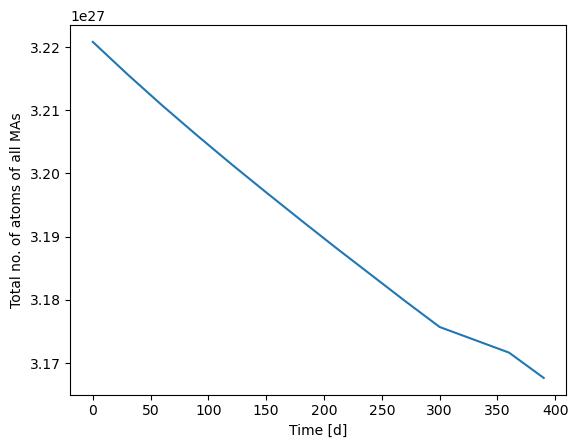

In [37]:
total_MA = np237+am241+am243+cm243+cm244+cm245
plt.plot(time, total_MA)


plt.xlabel("Time [d]")
plt.ylabel("Total no. of atoms of all MAs");

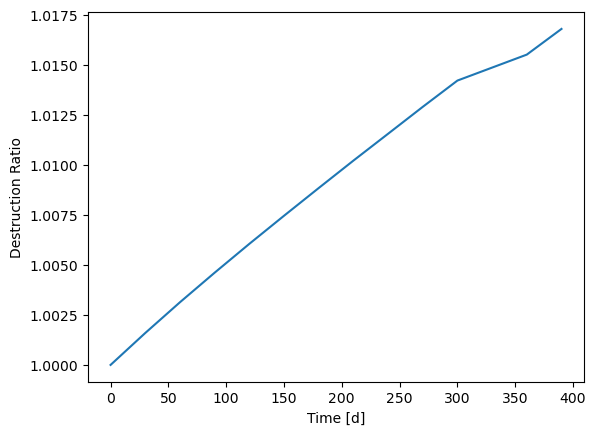

In [38]:
dr = (np237[0]+am241[0]+am243[0]+cm243[0]+cm244[0]+cm245[0])/(np237+am241+am243+cm243+cm244+cm245)
plt.plot(time, dr)


plt.xlabel("Time [d]")
plt.ylabel("Destruction Ratio");

In [39]:
print('Change in MA amount in the assembly: \n')
print('Np-237',(np237[-1]-np237[0])*237/6.023e23,'g')
print('Am-241',(am241[-1]-am241[0])*241/6.023e23,'g')
print('Am-243',(am243[-1]-am243[0])*243/6.023e23,'g')
print('Cm-243',(cm243[-1]-cm243[0])*243/6.023e23,'g')
print('Cm-244',(cm244[-1]-cm244[0])*244/6.023e23,'g')
print('Cm-245',(cm245[-1]-cm245[0])*245/6.023e23,'g')

print('\nTransmutation rates: \n')
print('Np-237',(np237[0]-np237[-1])*365*100/(np237[0]*time[-1]),'% per year')
print('Am-241',(am241[0]-am241[-1])*365*100/(am241[0]*time[-1]),'% per year')
print('Am-243',(am243[0]-am243[-1])*365*100/(am243[0]*time[-1]),'% per year')
print('Cm-243',(cm243[0]-cm243[-1])*365*100/(cm243[0]*time[-1]),'% per year')
print('Cm-244',(cm244[0]-cm244[-1])*365*100/(cm244[0]*time[-1]),'% per year')
print('Cm-245',(cm245[0]-cm245[-1])*365*100/(cm245[0]*time[-1]),'% per year')

Change in MA amount in the assembly: 

Np-237 -26431.10808613062 g
Am-241 -3469.5546575081125 g
Am-243 3334.3352299721923 g
Cm-243 38.38308821330589 g
Cm-244 4618.907711189504 g
Cm-245 1183.2837187866091 g

Transmutation rates: 

Np-237 3.442028697001583 % per year
Am-241 0.961876619013898 % per year
Am-243 -2.0336905396106135 % per year
Cm-243 -9.364304472823124 % per year
Cm-244 -6.615721699602729 % per year
Cm-245 -33.310318454548344 % per year


In [40]:
# Overall transmutation rate

TR = ((np237[0]-np237[-1]) + (am241[0]-am241[-1]) + (am243[0]-am243[-1]) + (cm243[0]-cm243[-1]) + 
      (cm244[0]-cm244[-1]) + (cm245[0]-cm245[-1])) * 100 / (np237[0] + am241[0] + am243[0] + cm243[0] + cm244[0] + 
                                                      cm245[0])
print(TR)

1.650874147210346


In [42]:
#################################### TMOX #################################

#fissions
_,u233_fiss_1 = results.get_reaction_rate("1","U233","fission")
_,u235_fiss_1 = results.get_reaction_rate("1","U235","fission")
_,pu239_fiss_1 = results.get_reaction_rate("1","Pu239","fission")
_,pu241_fiss_1 = results.get_reaction_rate("1","Pu241","fission")


#captures 
_,th232_capt_1 = results.get_reaction_rate("1","Th232","(n,gamma)") #for th232 to u233      #fertile 
_,u233_capt_1 = results.get_reaction_rate("1","U233","(n,gamma)")  #for u233 to u234        #disapp
_,u234_capt_1 = results.get_reaction_rate("1","U234","(n,gamma)")  #for u234 to u235        #fertile  
_,u235_capt_1 = results.get_reaction_rate("1","U235","(n,gamma)")  #for u235 to u236        #diaspp
_,u238_capt_1 = results.get_reaction_rate("1","U238","(n,gamma)")  #for u238 to pu239       #fertile
_,pu239_capt_1 = results.get_reaction_rate("1","Pu239","(n,gamma)") #for pu239 to pu 240    #disapp 
_,pu240_capt_1 = results.get_reaction_rate("1","Pu240","(n,gamma)") #for pu240 to pu 241    #fertile 
_,pu241_capt_1 = results.get_reaction_rate("1","Pu241","(n,gamma)") #for pu241 to pu 242    #disapp 


#absorptions 
u233_abs_1 = u233_fiss_1 + u233_capt_1
u235_abs_1 = u235_fiss_1 + u235_capt_1 
pu239_abs_1 = pu239_fiss_1 + pu239_capt_1
pu241_abs_1 = pu241_fiss_1 + pu241_capt_1



fertile_capt_1 = th232_capt_1 + u234_capt_1 + u238_capt_1 + pu240_capt_1 

fissile_abs_1 = u233_abs_1 + u235_abs_1 + pu239_abs_1 + pu241_abs_1

################################# blanket ###########################################

#fissions
_,u233_fiss_2 = results.get_reaction_rate("2","U233","fission")
_,u235_fiss_2 = results.get_reaction_rate("2","U235","fission")
_,pu239_fiss_2 = results.get_reaction_rate("2","Pu239","fission")
_,pu241_fiss_2 = results.get_reaction_rate("2","Pu241","fission")


#captures 
_,th232_capt_2 = results.get_reaction_rate("2","Th232","(n,gamma)") #for th232 to u233      #fertile 
_,u233_capt_2 = results.get_reaction_rate("2","U233","(n,gamma)")  #for u233 to u234        #disapp
_,u234_capt_2 = results.get_reaction_rate("2","U234","(n,gamma)")  #for u234 to u235        #fertile  
_,u235_capt_2 = results.get_reaction_rate("2","U235","(n,gamma)")  #for u235 to u236        #diaspp
_,u238_capt_2 = results.get_reaction_rate("2","U238","(n,gamma)")  #for u238 to pu239       #fertile
_,pu239_capt_2 = results.get_reaction_rate("2","Pu239","(n,gamma)") #for pu239 to pu 240    #disapp 
_,pu240_capt_2 = results.get_reaction_rate("2","Pu240","(n,gamma)") #for pu240 to pu 241    #fertile 
_,pu241_capt_2 = results.get_reaction_rate("2","Pu241","(n,gamma)") #for pu241 to pu 242    #disapp 


#absorptions 
u233_abs_2 = u233_fiss_2 + u233_capt_2
u235_abs_2 = u235_fiss_2 + u235_capt_2 
pu239_abs_2 = pu239_fiss_2 + pu239_capt_2
pu241_abs_2 = pu241_fiss_2 + pu241_capt_2



fertile_capt_2 =  th232_capt_2 + u234_capt_2 + u238_capt_2 + pu240_capt_2 

fissile_abs_2 = u233_abs_2 + u235_abs_2 + pu239_abs_2 + pu241_abs_2

############################## bottom  Thermal #############################################

#fissions
_,u233_fiss_3 = results.get_reaction_rate("5","U233","fission")
_,u235_fiss_3 = results.get_reaction_rate("5","U235","fission")
_,pu239_fiss_3 = results.get_reaction_rate("5","Pu239","fission")
_,pu241_fiss_3 = results.get_reaction_rate("5","Pu241","fission")


#captures 
_,th232_capt_3 = results.get_reaction_rate("5","Th232","(n,gamma)") #for th232 to u233      #fertile 
_,u233_capt_3 = results.get_reaction_rate("5","U233","(n,gamma)")  #for u233 to u234        #disapp
_,u234_capt_3 = results.get_reaction_rate("5","U234","(n,gamma)")  #for u234 to u235        #fertile  
_,u235_capt_3 = results.get_reaction_rate("5","U235","(n,gamma)")  #for u235 to u236        #diaspp
_,u238_capt_3 = results.get_reaction_rate("5","U238","(n,gamma)")  #for u238 to pu239       #fertile
_,pu239_capt_3 = results.get_reaction_rate("5","Pu239","(n,gamma)") #for pu239 to pu 240    #disapp 
_,pu240_capt_3 = results.get_reaction_rate("5","Pu240","(n,gamma)") #for pu240 to pu 241    #fertile 
_,pu241_capt_3 = results.get_reaction_rate("5","Pu241","(n,gamma)") #for pu241 to pu 242    #disapp 


#absorptions 
u233_abs_3 = u233_fiss_3 + u233_capt_3
u235_abs_3 = u235_fiss_3 + u235_capt_3 
pu239_abs_3 = pu239_fiss_3 + pu239_capt_3
pu241_abs_3 = pu241_fiss_3 + pu241_capt_3



fertile_capt_3 = th232_capt_3 + u234_capt_3 + u238_capt_3 + pu240_capt_3 

fissile_abs_3 = u233_abs_3 + u235_abs_3 + pu239_abs_3 + pu241_abs_3


########################################### middle  Thermal ###################################

#fissions
_,u233_fiss_4 = results.get_reaction_rate("4","U233","fission")
_,u235_fiss_4 = results.get_reaction_rate("4","U235","fission")
_,pu239_fiss_4 = results.get_reaction_rate("4","Pu239","fission")
_,pu241_fiss_4 = results.get_reaction_rate("4","Pu241","fission")


#captures 
_,th232_capt_4 = results.get_reaction_rate("4","Th232","(n,gamma)") #for th232 to u233      #fertile 
_,u233_capt_4 = results.get_reaction_rate("4","U233","(n,gamma)")  #for u233 to u234        #disapp
_,u234_capt_4 = results.get_reaction_rate("4","U234","(n,gamma)")  #for u234 to u235        #fertile  
_,u235_capt_4 = results.get_reaction_rate("4","U235","(n,gamma)")  #for u235 to u236        #diaspp
_,u238_capt_4 = results.get_reaction_rate("4","U238","(n,gamma)")  #for u238 to pu239       #fertile
_,pu239_capt_4 = results.get_reaction_rate("4","Pu239","(n,gamma)") #for pu239 to pu 240    #disapp 
_,pu240_capt_4 = results.get_reaction_rate("4","Pu240","(n,gamma)") #for pu240 to pu 241    #fertile 
_,pu241_capt_4 = results.get_reaction_rate("4","Pu241","(n,gamma)") #for pu241 to pu 242    #disapp 


#absorptions 
u233_abs_4 = u233_fiss_4 + u233_capt_4
u235_abs_4 = u235_fiss_4 + u235_capt_4 
pu239_abs_4 = pu239_fiss_4 + pu239_capt_4
pu241_abs_4 = pu241_fiss_4 + pu241_capt_4



fertile_capt_4 = th232_capt_4 + u234_capt_4 + u238_capt_4 + pu240_capt_4 

fissile_abs_4 = u233_abs_4 + u235_abs_4 + pu239_abs_4 + pu241_abs_4


########################################### MA ROD ##################################
#fissions
_,u233_fiss_6 = results.get_reaction_rate("17","U233","fission")
_,u235_fiss_6 = results.get_reaction_rate("17","U235","fission")
_,pu239_fiss_6 = results.get_reaction_rate("17","Pu239","fission")
_,pu241_fiss_6 = results.get_reaction_rate("17","Pu241","fission")


#captures 
_,th232_capt_6 = results.get_reaction_rate("17","Th232","(n,gamma)") #for th232 to u233      #fertile 
_,u233_capt_6 = results.get_reaction_rate("17","U233","(n,gamma)")  #for u233 to u234        #disapp
_,u234_capt_6 = results.get_reaction_rate("17","U234","(n,gamma)")  #for u234 to u235        #fertile  
_,u235_capt_6 = results.get_reaction_rate("17","U235","(n,gamma)")  #for u235 to u236        #diaspp
_,u238_capt_6 = results.get_reaction_rate("17","U238","(n,gamma)")  #for u238 to pu239       #fertile
_,pu239_capt_6 = results.get_reaction_rate("17","Pu239","(n,gamma)") #for pu239 to pu 240    #disapp 
_,pu240_capt_6 = results.get_reaction_rate("17","Pu240","(n,gamma)") #for pu240 to pu 241    #fertile 
_,pu241_capt_6 = results.get_reaction_rate("17","Pu241","(n,gamma)") #for pu241 to pu 242    #disapp 


#absorptions 
u233_abs_6 = u233_fiss_6 + u233_capt_6
u235_abs_6 = u235_fiss_6 + u235_capt_6 
pu239_abs_6 = pu239_fiss_6 + pu239_capt_6
pu241_abs_6 = pu241_fiss_6 + pu241_capt_6



fertile_capt_6 = th232_capt_6 + u234_capt_6 + u238_capt_6 + pu240_capt_6 

fissile_abs_6 = u233_abs_6 + u235_abs_6 + pu239_abs_6 + pu241_abs_6

core_fertile_capt = fertile_capt_1 + fertile_capt_2 + fertile_capt_3 + fertile_capt_4  + fertile_capt_6 
core_fissile_abs = fissile_abs_1 + fissile_abs_2 + fissile_abs_3 + fissile_abs_4  + fissile_abs_6

br_core = core_fertile_capt / core_fissile_abs
print(br_core)

[0.41544615 0.45636306 0.46548097 0.47511861 0.49077939 0.50523619
 0.51488325 0.54031068 0.54572377 0.56202997 0.57598386 0.58601128
 0.59117258]


In [43]:
fuel_loading = operator.heavy_metal
print('The assembly power is', power, 'W')
print('\nThe time steps are: \n', time)
print('\nThe initial heavy metal loading is', fuel_loading/1000, 'kg')

burnup = (power * 10**(-6))*time/(fuel_loading * 10**(-3))
print('\nThe burnup steps are:\n', burnup)

print('\nThe power density is', (power * 10**(-6))/(fuel_loading/1000), 'MW/kg')

The assembly power is 1800000000.0 W

The time steps are: 
 [  0.  30.  60.  90. 120. 150. 180. 210. 240. 270. 300. 360. 390.]

The initial heavy metal loading is 117364.14596761572 kg

The burnup steps are:
 [0.         0.46010645 0.92021289 1.38031934 1.84042578 2.30053223
 2.76063867 3.22074512 3.68085156 4.14095801 4.60106445 5.52127734
 5.98138379]

The power density is 0.015336881508060169 MW/kg


In [44]:
print('Th232',th232)
print('U233',u233)
print('U235',u235)
print('U238',u238)
print('Pu238',pu238)
print('Pu239',pu239)
print('Pu240',pu240)
print('Pu241',pu241)
print('Pu242',pu242)
print('Np237',np237)
print('Am241',am241)
print('Am243',am243)
print('Cm243',cm243)
print('Cm244',cm244)
print('Cm245',cm245)

Th232 [2.57012493e+28 2.56947523e+28 2.56854788e+28 2.56756165e+28
 2.56650144e+28 2.56532323e+28 2.56403279e+28 2.56268191e+28
 2.56110663e+28 2.55950040e+28 2.55774553e+28 2.55588580e+28
 2.55394165e+28]
U233 [0.00000000e+00 1.88263025e+24 6.88125387e+24 1.40846494e+25
 2.26185474e+25 3.22309755e+25 4.28795780e+25 5.43830104e+25
 6.69602940e+25 8.05734710e+25 9.50406294e+25 1.10441788e+26
 1.26639396e+26]
U235 [1.21379338e+28 1.19386704e+28 1.17555786e+28 1.15781723e+28
 1.14072637e+28 1.12440027e+28 1.10879313e+28 1.09366489e+28
 1.07970696e+28 1.06604297e+28 1.05321420e+28 1.04093678e+28
 1.02919468e+28]
U238 [2.80828710e+29 2.80730116e+29 2.80625638e+29 2.80519773e+29
 2.80412845e+29 2.80304115e+29 2.80193865e+29 2.80082336e+29
 2.79968532e+29 2.79854071e+29 2.79738191e+29 2.79620841e+29
 2.79502633e+29]
Pu238 [5.31106883e+26 5.35187766e+26 5.40224491e+26 5.45654837e+26
 5.51385140e+26 5.57370009e+26 5.63579847e+26 5.70017408e+26
 5.76556340e+26 5.83298446e+26 5.90127324e+26 5.970